# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement


There are many variables involved when predicting the price of a house on sale. However there are many features present and some might be more important than others in predicting house price.

Using the Ame Housing Dataset for individual residential properties sold from 2006 to 2010 and with 70 columns of different features relating to houses, we are creating a suitable regression model that will predict the price of a house in Ame and find the top features.

This is done by using the train.csv and test.csv dataset from DSI Kaggle Competition and comparing the RMSE scores from the different regression models.The final model chosen can be used to help buyers, sellers and real estate agents predict house price in Ames, Iowa.

## Executive Summary
- Data cleaning
- Columns are sorted into Categorical, Ordinal and Continuous types.
- Exploratory Data Analysis on 70 features and elimination by inference using data visualization.
- Use Regression models to predict 'SalePrice' of residential properties from train.csv and test.csv
- Use best regression model for Kaggle Competition

###  Contents:
- [1. Standard Imports](#1.Standard-Imports)
- [2. Data Import for train.csv](#2.Data-Import-for-train-dataset)
- [3. Data Import for test.csv](#3.Data-Import-for-test-dataset)
- [4. Data Cleaning for train dataset](#4.Data-Cleaning-for-train-dataset)
- [5. Data Cleaning for test dataset](#5.Data-Cleaning-for-test-dataset)
- [6. Sorting the columns into Continuous or (Categorical & Ordinal)](#6.Separating-columns-into-Continuous-&-(Categorical-&-Ordinal))
- [7. Addressing outliers](#7.Addressing-Outliers)
- [8. Continuous Variables EDA & Inference](#8.Continuous-Variables-EDA-&-Inference)
- [9. Categorical & Ordinal Variables EDA & Inference](#9.Categorical-&-Ordinal-Variables-EDA-&-Inference)
- [10.Adding 'age of house' column ](#10.Including-an-interaction-column-for-'age-of-house')
- [11.Mapping values to Ordinal columns](#11.Mapping-values-to-Ordinal-columns)
- [12.Choosing Features based on inference from EDA](#12.Choosing-Features-based-on-inference-from-EDA)
- [13.Export data for cleaned train and test dataset](#13.Export-data-for-cleaned-train-and-test-dataset)

### 1.Standard Imports

In [2]:
# standard imports(pandas, numpy and plt)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### 2.Data Import for train dataset

In [3]:
# load data
train =pd.read_csv('train.csv')

In [4]:
train.head()

# print the first 5 rows to see what each columns represent
# see if the columns have a numerical or categorical values

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.info()

# there are 2051 rows in this data
# there are missing data as not all columns have 2051 non-null
# there are datatypes: int64, object, float

# columns can be categorical if the dtype is object
# checked against data dictionary, dtype int64 or float64 can be either categorical or continuous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
train.describe().transpose()

# .describe() only shows for numerical columns int64 & float
# .transpose() table has many numerical columns

# upon checking data dictionary in provided website
# Noted that columns like ['Full Bath'] can only be whole number, dtype is int64.
# Noted that columns like ['Bsmt Full Bath'] can only be while number, dtype is float64
# Noted that columns like ['Lot Area'] has dtype int64, but logically it should be continuous variable
# Need to split the Numerical columns into categorical(Norminal or Ordinal) and contnuous based on Data Dictionary

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### Inference from the .describe() table
- talk about the range of house 'SalePrice'
- mean of 'SalePrice
- min of 'SalePrice'
- max of 'SalePrice;
- there are continuous, categorical & ordinal columns in this dataset

### 3.Data Import for test dataset

In [7]:
# load data
test =pd.read_csv('test.csv')

In [8]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [10]:
test.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
dtype: int64

In [11]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1435.0,2197.0,2.928000e+03
PID,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,535454160.0,907192140.0,1.007100e+09
MS SubClass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,719.0,6.963004e+01,2.362537e+01,21.0,59.0,68.0,80.0,1.820000e+02
Lot Area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9453.0,11606.5,2.152450e+05
Overall Qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.0,7.0,1.000000e+01
Overall Cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.0,6.0,9.000000e+00
Year Built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1972.0,2000.0,2.010000e+03
Year Remod/Add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1992.0,2003.0,2.010000e+03
Mas Vnr Area,878.0,1.069829e+02,1.883568e+02,0.0,0.0,0.0,173.5,1.378000e+03


In [12]:
len(train.columns)

81

In [13]:
len(test.columns)
# make sense for train dataset to have extra 1 column, as there is 'SalePrice' columns

80

### 4.Data Cleaning for train dataset

In [14]:
# Check the dataframe & Remove columns with values that are unique to each row
# if the rows are float64, it could be continuous variable

def removecol_unique_to_rows(df):
    print(f'There are {len(df)} in this dataset')
    for i in df:  
        i_dtype = str(df[i].dtypes)
        num_of_unique_values = len(df[i].unique()) 
        if (i_dtype != 'float64') & (len(df)==num_of_unique_values):
            print(f'Column {i} has unique values for each of the {num_of_unique_values} rows, hence they are dropped.' )
            df.drop(columns=[i],axis=1, inplace=True)
    return df.head()

In [15]:
removecol_unique_to_rows(train)

There are 2051 in this dataset
Column Id has unique values for each of the 2051 rows, hence they are dropped.
Column PID has unique values for each of the 2051 rows, hence they are dropped.


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [16]:
# Check for Null Values

train.isnull().sum().sort_values(ascending=False).head(30)

# check the sum of null values for each category
# noted there are 26 columns with null values

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
Roof Style           0
dtype: int64

In [17]:
# create a table of categorical features with total null values

null_data = train.isnull().sum().sort_values(ascending=False).head(26)

null_table=pd.DataFrame(null_data, columns=[ 'number of null values'])

# add column to see % of Null Values
null_table['Percentage of Null Values'] = (null_table['number of null values']/len(train))*100
null_table

,number of null values,Percentage of Null Values
Pool QC,2042,99.561190
Misc Feature,1986,96.830814
Alley,1911,93.174061
Fence,1651,80.497318
Fireplace Qu,1000,48.756704
Lot Frontage,330,16.089712
Garage Qual,114,5.558264
Garage Cond,114,5.558264
Garage Yr Blt,114,5.558264
Garage Finish,114,5.558264


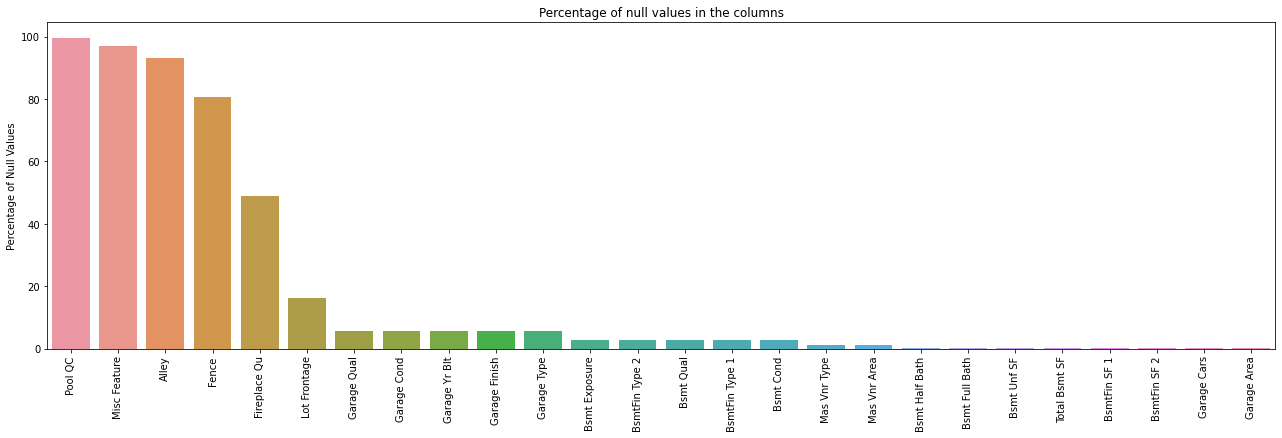

In [18]:
# Quick plot to view % of Null views
# 2 outlier

plt.figure(figsize=(22,6))
sns.barplot(x=null_table.index, y=null_table['Percentage of Null Values'], data=null_table)
plt.xticks(rotation=90);
plt.title('Percentage of null values in the columns');

In [19]:
# sorted the columns with missing values based on alphabetical order
# because there could be relationship between columns example Bsmt Half Bath & Bsmt Cont are related to the basement

(null_table.index).sort_values()

Index(['Alley', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fence',
       'Fireplace Qu', 'Garage Area', 'Garage Cars', 'Garage Cond',
       'Garage Finish', 'Garage Qual', 'Garage Type', 'Garage Yr Blt',
       'Lot Frontage', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature',
       'Pool QC', 'Total Bsmt SF'],
      dtype='object')

In [20]:
# ['Pool Area'] is related to ['Pool QC']
# if there is no 'Pool Area' means there is No Pool, hence 'NA'

len(train.loc[(train['Pool Area']==0) & (train['Pool QC'].isnull())])

2042

In [21]:
train['Pool QC'].isnull().sum()

2042

In [22]:
train['Pool QC'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2046    True
2047    True
2048    True
2049    True
2050    True
Name: Pool QC, Length: 2051, dtype: bool

In [23]:
# number of ['Pool Area']==0  same as number of null values in ['Pool QC']

train['Pool QC'].fillna('NA', inplace=True)

In [24]:
train['Pool QC'].dtypes

dtype('O')

In [25]:
train['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [27]:
# ['Misc Val'] is related to ['Misc Feature']
# if 'Misc Val'==0 means there is None for 'Misc Feature', hence 'NA'

len(train.loc[(train['Misc Val']==0) & (train['Misc Feature'].isnull())])

1986

In [28]:
train['Misc Feature'].isnull().sum()

1986

In [29]:
# number of ['Misc Val']==0  same as number of null values in ['Misc Feature']

train['Misc Feature'].fillna('NA', inplace=True)

In [30]:
# Alley is not related to other factors
# Some house have no alley acces hence replace as 'NA'

train['Alley'].fillna('NA', inplace=True)

In [31]:
# Fence is not related to other factos
# Some house have no fence hence replace as 'NA'

train['Fence'].fillna('NA', inplace=True)

In [32]:
# ['Fireplaces'] is related to ['Fireplaces Qu']
# if 'Fireplaces'==0 means there is No Fireplace, hence 'NA' for 'Fireplaces Qu'

len(train.loc[(train['Fireplaces']==0) & (train['Fireplace Qu'].isnull())])

1000

In [33]:
train['Fireplace Qu'].isnull().sum()

1000

In [34]:
train['Fireplace Qu'].fillna('NA', inplace=True)

In [35]:
# 'Lot Frontage' is related to 'Lot Area'
# but both are continuous values
# checked that lot frontage comes from the lot area
# unable assign 16% of the null values
# decided to drop this column

#train.drop(columns=['Lot Frontage'],inplace=True)

In [36]:
train[(train['Lot Frontage'].isnull())][['Street', 'Lot Frontage', 'Lot Area', 'Alley']]

,Street,Lot Frontage,Lot Area,Alley
0,Pave,NaN,13517,NA
7,Pave,NaN,12160,NA
8,Pave,NaN,15783,NA
23,Pave,NaN,7980,NA
27,Pave,NaN,11700,Grvl
...,...,...,...,...
2016,Pave,NaN,7791,NA
2022,Pave,NaN,16381,NA
2028,Pave,NaN,20781,NA
2031,Pave,NaN,12537,NA


Median for 'Lot Frontage' : 68.0
Mean for 'Lot Frontage' : 69.05520046484602
Mode for 'Lot Frontage' : 60.0


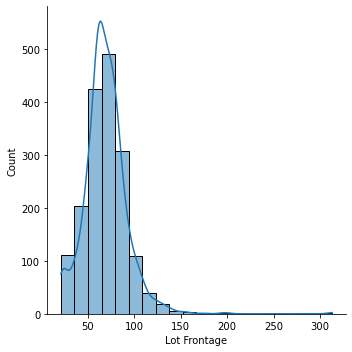

In [37]:
sns.displot(train['Lot Frontage'], kde=True, bins=20)
print("Median for 'Lot Frontage' :", train['Lot Frontage'].median())
print("Mean for 'Lot Frontage' :", train['Lot Frontage'].mean())
print("Mode for 'Lot Frontage' :", train['Lot Frontage'].mode()[0])

In [38]:
# train['Lot Frontage']
# decided to replace with median so that the overall median will not change
train['Lot Frontage'].fillna(train['Lot Frontage'].median(), inplace =True)

In [39]:
# ['Mas Vnr Area'] is related to ['Mas Vnr Type']
# if 'Mas Vnr Area' is NaN, replace as 0
# if ;Mas Vnr Type' is NaN, replace as None

len(train[(train['Mas Vnr Area'].isnull()) & (train['Mas Vnr Type'].isnull())])

22

In [40]:
# checked there are rows with no Mas Vnr Type but there is Mas Vnr Area
train[(train['Mas Vnr Type']=='None')&(train['Mas Vnr Area']>0)][['Mas Vnr Type', 'Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
765,None,1.0
810,None,288.0
1148,None,1.0
1684,None,1.0
1832,None,344.0


In [41]:
# There is no Masonry in the house
train['Mas Vnr Area'].fillna(0, inplace=True)
train['Mas Vnr Type'].fillna('None', inplace=True)

In [42]:
# check on the remaining columns with null values
train.isnull().sum().sort_values(ascending=False).head(21)

Garage Qual       114
Garage Cond       114
Garage Yr Blt     114
Garage Finish     114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
BsmtFin Type 1     55
Bsmt Cond          55
Bsmt Qual          55
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Area         1
Garage Cars         1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Exterior 1st        0
Mas Vnr Type        0
Exterior 2nd        0
dtype: int64

In [43]:
missing_basement_values=['Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2','Total Bsmt SF']

In [46]:
# there are a mixture of columns regarding Basement Bsmt, 
# start with columns with the least null values
# check with other Bsmt columns that they are NaN too

# Continuous dtype
train[train['Bsmt Unf SF'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Continuous dtype
train[train['Total Bsmt SF'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Continuous dtype
train[train['BsmtFin SF 2'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Continuous dtype
train[train['BsmtFin SF 1'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# discrete
# if no bath, replace as 0
train[train['Bsmt Half Bath'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
616,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# discrete
# if no bath, replace as 0
train[train['Bsmt Full Bath'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
616,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
for i in ['Bsmt Unf SF', 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Half Bath', 'Bsmt Full Bath']:
    train[i].fillna(0, inplace=True)

In [53]:
train.isnull().sum().sort_values(ascending=False).head(21)

Garage Cond       114
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
BsmtFin Type 1     55
Bsmt Cond          55
Bsmt Qual          55
Garage Area         1
Garage Cars         1
Lot Shape           0
Mas Vnr Area        0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        0
Exter Qual          0
Year Built          0
dtype: int64

In [54]:
# there are rows with ['Bsmt Exposure']isnull but with values in other columns
# ['Bsmt Exposure'] has 58 null values while other Bsmt columns have 55 null values

train[(train['Bsmt Exposure'].isnull())& (train['Bsmt Unf SF']!=0)][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1456,TA,NaN,0.0,0.0,Gd,725.0,0.0,0.0,Unf,Unf,725.0
1547,TA,NaN,0.0,0.0,Gd,1595.0,0.0,0.0,Unf,Unf,1595.0
1997,TA,NaN,0.0,0.0,Gd,936.0,0.0,0.0,Unf,Unf,936.0


In [55]:
# check if ['Bsmt Exposure'] & other ['Bsmt Qual'] are on the same row

len(train[(train['Bsmt Exposure'].isnull())& (train['Bsmt Qual'].isnull())][missing_basement_values])
# there are 55 rows which corresponds to total ['Bsmt Qual']

55

In [56]:
# They are either null or zero for all [missing_basement_values]. hence sum is 0

(train[(train['Bsmt Exposure'].isnull())& (train['Bsmt Qual'].isnull())][missing_basement_values]).sum()

Bsmt Cond         0.0
Bsmt Exposure     0.0
Bsmt Full Bath    0.0
Bsmt Half Bath    0.0
Bsmt Qual         0.0
Bsmt Unf SF       0.0
BsmtFin SF 1      0.0
BsmtFin SF 2      0.0
BsmtFin Type 1    0.0
BsmtFin Type 2    0.0
Total Bsmt SF     0.0
dtype: float64

In [57]:
# find the index to replace 'NA'
index_to_replace = train[(train['Bsmt Exposure'].isnull())& (train['Bsmt Qual'].isnull())][missing_basement_values].index

In [58]:
for i in ['Bsmt Exposure','BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']:
    train.loc[index_to_replace, i] = 'NA'

In [59]:
# Remaining ['Bsmt Exposure'] null values
# need to replace with values as the Basement exist based on other columns

train[train['Bsmt Exposure'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1456,TA,NaN,0.0,0.0,Gd,725.0,0.0,0.0,Unf,Unf,725.0
1547,TA,NaN,0.0,0.0,Gd,1595.0,0.0,0.0,Unf,Unf,1595.0
1997,TA,NaN,0.0,0.0,Gd,936.0,0.0,0.0,Unf,Unf,936.0


In [60]:
# Remaining ['BsmtFin Type 2'] null values
# need to replace with values as the Basement exist based on other columns

train[train['BsmtFin Type 2'].isnull()][missing_basement_values]

,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF
1147,TA,No,1.0,0.0,Gd,1603.0,1124.0,479.0,GLQ,NaN,3206.0


In [61]:
# check the current remaining values
train.isnull().sum().sort_values(ascending=False).head(10)

Garage Cond       114
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Type       113
Bsmt Exposure       3
Garage Cars         1
Garage Area         1
BsmtFin Type 2      1
Utilities           0
dtype: int64

In [62]:
missing_garage_values=['Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type', 'Garage Cars', 'Garage Area']

In [63]:
# for ['Garage Cars'] & ['Garage Area'] is null row, a garage exists!

train[(train['Garage Cars'].isnull()) & (train['Garage Area'].isnull())][missing_garage_values]

,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Garage Type,Garage Cars,Garage Area
1712,NaN,NaN,NaN,NaN,Detchd,NaN,NaN


In [64]:
# check the other Garage column and if same as Null garage columns

len(train[train['Garage Type'].isnull()][missing_garage_values])

113

In [65]:
train[train['Garage Type'].isnull()][missing_garage_values].sum()

# sum=0, means all of them are null

Garage Yr Blt    0.0
Garage Finish    0.0
Garage Qual      0.0
Garage Cond      0.0
Garage Type      0.0
Garage Cars      0.0
Garage Area      0.0
dtype: float64

In [66]:
index_garage_replace = train[train['Garage Type'].isnull()][missing_garage_values].index

In [67]:
for i in ['Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond','Garage Type']:
    train.loc[index_garage_replace, i] = 'NA'

In [68]:
train.isnull().sum().sort_values(ascending=False).head(8)

Bsmt Exposure     3
BsmtFin Type 2    1
Garage Yr Blt     1
Garage Finish     1
Garage Cars       1
Garage Area       1
Garage Qual       1
Garage Cond       1
dtype: int64

Median for 'Garage Area' : 480.0
Mean for 'Garage Area' : 473.6717073170732
Mode for 'Garage Area' : 0    0.0
dtype: float64


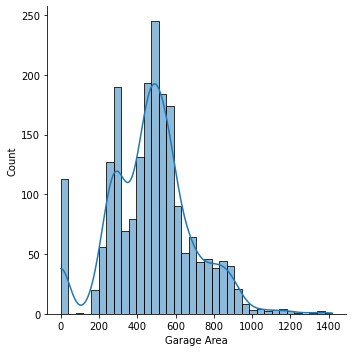

In [69]:
sns.displot(train['Garage Area'], kde=True)

print("Median for 'Garage Area' :", train['Garage Area'].median())
print("Mean for 'Garage Area' :", train['Garage Area'].mean())
print("Mode for 'Garage Area' :", train['Garage Area'].mode())

In [70]:
# 'Garage Area' has continuous float data type
train['Garage Area'].fillna(train['Garage Area'].median(), inplace=True)

In [71]:
# below columns have 

for i in ['Bsmt Exposure','BsmtFin Type 2','Garage Yr Blt','Garage Finish','Garage Cars','Garage Qual','Garage Cond']:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [72]:
# check that null values filled up
train.isnull().sum().sort_values(ascending=False)

SalePrice        0
Foundation       0
Roof Matl        0
Exterior 1st     0
Exterior 2nd     0
                ..
TotRms AbvGrd    0
Functional       0
Fireplaces       0
Fireplace Qu     0
MS SubClass      0
Length: 79, dtype: int64

### 5.Data Cleaning for test dataset

In [73]:
# used the function created earlier to remove columns will values unique to each of the row

removecol_unique_to_rows(test)

There are 879 in this dataset
Column Id has unique values for each of the 879 rows, hence they are dropped.
Column PID has unique values for each of the 879 rows, hence they are dropped.


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [74]:
# there are null values in test set too
test.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
BsmtFin Type 2     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
Electrical          1
Mas Vnr Area        1
Mas Vnr Type        1
Year Built          0
dtype: int64

In [75]:
# there are null values in test set too
null_data = test.isnull().sum().sort_values(ascending=False).head(19)
null_table=pd.DataFrame(null_data, columns=[ 'number of null values'])

# add column to see % of Null Values
null_table['Percentage of Null Values'] = (null_table['number of null values']/len(train))*100
null_table

,number of null values,Percentage of Null Values
Pool QC,875,42.662116
Misc Feature,838,40.858118
Alley,821,40.029254
Fence,707,34.470990
Fireplace Qu,422,20.575329
Lot Frontage,160,7.801073
Garage Cond,45,2.194052
Garage Qual,45,2.194052
Garage Yr Blt,45,2.194052
Garage Finish,45,2.194052


Text(0.5, 1.0, 'Percentage of null values in the columns')

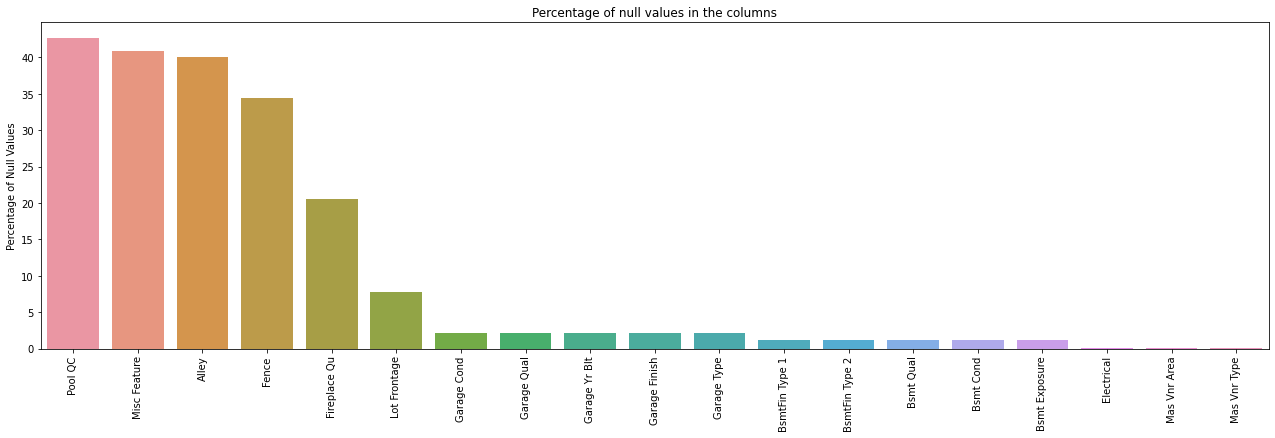

In [76]:
# Quick plot to view % of Null views
# 2 outlier

plt.figure(figsize=(22,6))
sns.barplot(x=null_table.index, y=null_table['Percentage of Null Values'], data=null_table)
plt.xticks(rotation=90);
plt.title('Percentage of null values in the columns')

In [77]:
# ['Pool Area'] == 0 is same row as ['Pool QC']

len(test.loc[(test['Pool Area']==0) & (test['Pool QC'].isnull())])

875

In [78]:
test['Pool QC'].fillna('NA', inplace=True)

In [79]:
len(test.loc[(test['Misc Val']==0) & (test['Misc Feature'].isnull())])

838

In [80]:
test['Misc Feature'].fillna('NA', inplace=True)

In [81]:
# Alley is not related to other factors
# Some house have no alley acces hence replace as 'NA'

test['Alley'].fillna('NA', inplace=True)

In [82]:
# Fence is not related to other factos
# Some house have no fence hence replace as 'NA'

test['Fence'].fillna('NA', inplace=True)

In [83]:
# ['Fireplaces'] is related to ['Fireplaces Qu']
# if 'Fireplaces'==0 means there is No Fireplace, hence 'NA' for 'Fireplaces Qu'

len(test.loc[(test['Fireplaces']==0) & (test['Fireplace Qu'].isnull())])

422

In [84]:
test['Fireplace Qu'].fillna('NA', inplace=True)

Median for 'Lot Frontage' : 68.0
Mean for 'Lot Frontage' : 69.63004172461753
Mode for 'Lot Frontage' : 60.0


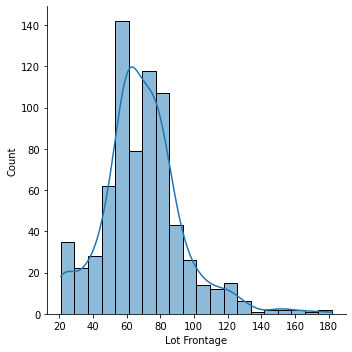

In [85]:
# 'Lot Frontage' is related to 'Lot Area'
# but both are continuous values
# checked that lot frontage comes from the lot area
# unable assign 16% of the null values
# decided to drop this column

#test.drop(columns=['Lot Frontage'],inplace=True)
#test['Lot Frontage'].fillna(0, inplace =True)

sns.displot(test['Lot Frontage'], kde=True, bins=20)
print("Median for 'Lot Frontage' :", test['Lot Frontage'].median())
print("Mean for 'Lot Frontage' :", test['Lot Frontage'].mean())
print("Mode for 'Lot Frontage' :", test['Lot Frontage'].mode()[0])

In [86]:
test['Lot Frontage'].fillna(test['Lot Frontage'].median(), inplace =True)

In [87]:
list_of_garagecol_null = ['Garage Cond','Garage Qual','Garage Yr Blt','Garage Finish','Garage Type']
list_of_bsmtcol_null = ['Bsmt Exposure','BsmtFin Type 1','Bsmt Qual','BsmtFin Type 2','Bsmt Cond']

In [88]:
# use 'Garage Type' as the other 
test[test['Garage Type'].isnull()][list_of_garagecol_null].sum()

Garage Cond      0.0
Garage Qual      0.0
Garage Yr Blt    0.0
Garage Finish    0.0
Garage Type      0.0
dtype: float64

In [89]:
#how many rows are null
len(test[test['Garage Type'].isnull()][list_of_garagecol_null])

44

In [90]:
index_garage_replace = test[test['Garage Type'].isnull()][list_of_garagecol_null].index

In [91]:
for i in list_of_garagecol_null:
    test.loc[index_garage_replace, i] = 'NA'

In [92]:
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtFin Type 2    25
BsmtFin Type 1    25
Bsmt Exposure     25
Bsmt Cond         25
Bsmt Qual         25
Mas Vnr Type       1
Garage Yr Blt      1
Garage Finish      1
Garage Qual        1
Garage Cond        1
Mas Vnr Area       1
Electrical         1
Year Built         0
Exter Qual         0
Exterior 2nd       0
Exter Cond         0
Foundation         0
Exterior 1st       0
Roof Matl          0
BsmtFin SF 1       0
dtype: int64

In [93]:
test[test['BsmtFin Type 2'].isnull()][list_of_bsmtcol_null].sum()

Bsmt Exposure     0.0
BsmtFin Type 1    0.0
Bsmt Qual         0.0
BsmtFin Type 2    0.0
Bsmt Cond         0.0
dtype: float64

In [94]:
len(test[test['BsmtFin Type 2'].isnull()][list_of_bsmtcol_null])

25

In [95]:
index_bsmt_replace= test[test['BsmtFin Type 2'].isnull()][list_of_bsmtcol_null].index

In [96]:
for i in list_of_bsmtcol_null:
    test.loc[index_bsmt_replace, i] = 'NA'

In [97]:
test.isnull().sum().sort_values(ascending=False).head(10)

Mas Vnr Area     1
Mas Vnr Type     1
Garage Yr Blt    1
Garage Finish    1
Electrical       1
Garage Qual      1
Garage Cond      1
Roof Style       0
Roof Matl        0
Exterior 1st     0
dtype: int64

In [98]:
len(test.loc[(test['Mas Vnr Area'].isnull()) & (test['Mas Vnr Type'].isnull())])

1

In [99]:
test[(test['Mas Vnr Area'].isnull()) & (test['Mas Vnr Type'].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
866,60,RL,70.0,8749,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,0,11,2009,WD


In [100]:
test['Mas Vnr Area'].fillna(0, inplace=True)
test['Mas Vnr Type'].fillna('NA', inplace=True)

In [101]:
for i in ['Garage Yr Blt','Garage Finish','Electrical','Garage Qual','Garage Cond']:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [102]:
test.isnull().sum()

MS SubClass     0
MS Zoning       0
Lot Frontage    0
Lot Area        0
Street          0
               ..
Misc Feature    0
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
Length: 78, dtype: int64

### 6.Separating columns into Continuous & (Categorical & Ordinal)

In [104]:
# make a list of the categorical features
# categorical features also include ordinal features
# ordinal features will be EDA together with categorical features

categorical_list = [ i for i in train if str(train[i].dtypes)=='object']

In [105]:
numeric_dtype_list = [ i for i in train if str(train[i].dtypes)!='object']

In [106]:
numeric_dtype_list

# but numeric dtype has a combination of categorical columns
# for example 'Bsmt Full Bath'
# need to find another criteria to separate them again

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [107]:
# create a dictionary for columns with numeric dtype
# assign the count of unique values to the keys

dictionary = dict()
for i in numeric_dtype_list:
    dictionary[i] = len(train[i].unique())


# convert the dictionary into DataFrame
# sort the by number of unique values, from large to small
# checked  ['MS SubClass'] has 16 unique counts and a nominal column
# columns with more 16 unique values are continuous
pd.DataFrame(dictionary.items(), columns=['column name', 'number of unique val']).sort_values(by='number of unique val',ascending=False)

,column name,number of unique val
2,Lot Area,1476
15,Gr Liv Area,1053
10,Bsmt Unf SF,967
12,1st Flr SF,915
11,Total Bsmt SF,892
35,SalePrice,828
8,BsmtFin SF 1,821
25,Garage Area,514
13,2nd Flr SF,504
7,Mas Vnr Area,373


In [110]:
# convert the dictionary into DataFrame
# sort the by number of unique values, from large to small
# checked  ['MS SubClass'] has 16 unique counts and a nominal column
# columns with more 16 unique values are continuous

pd.DataFrame(dictionary.items(), columns=['column name', 'number of unique val']).sort_values(by='number of unique val',ascending=False)


,column name,number of unique val
2,Lot Area,1476
15,Gr Liv Area,1053
10,Bsmt Unf SF,967
12,1st Flr SF,915
11,Total Bsmt SF,892
35,SalePrice,828
8,BsmtFin SF 1,821
25,Garage Area,514
13,2nd Flr SF,504
7,Mas Vnr Area,373


In [108]:
# checking my dictionary
dictionary['BsmtFin SF 1']

821

In [109]:
# split the list further into continuous list or append more to categorical list 

numeric_continuous = list()
for i in dictionary:
    if dictionary[i] > 16:
        numeric_continuous.append(i)  #create a new list for numeric continuous values
    else:
        categorical_list.append(i)    #add on the existing catergorical list made earlier

In [110]:
# checking that the sum of columns is correct
len(numeric_continuous) + len(categorical_list)

79

### 7.Addressing Outliers

Text(0.5, 1.0, "scatterplot of 'Mas Vnr Area' vs 'SalePrice'")

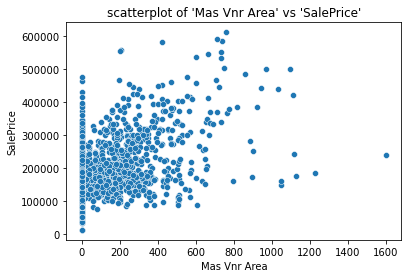

In [111]:
# there is a obvious outlier in the Mas Vnr Area'
sns.scatterplot(data=train, x='Mas Vnr Area', y=train['SalePrice'])
plt.title("scatterplot of 'Mas Vnr Area' vs 'SalePrice'")

Text(0.5, 1.0, "scatterplot of 'Mas Vnr Area' vs 'SalePrice' after removing outlier")

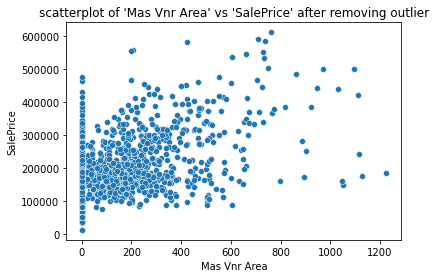

In [112]:
# decide to remove this outlier from the dataset
train.drop(train[train['Mas Vnr Area']>1400].index, axis=0, inplace=True)

# plot scatterplot after removing this outlier
sns.scatterplot(data=train, x='Mas Vnr Area', y=train['SalePrice'])
plt.title("scatterplot of 'Mas Vnr Area' vs 'SalePrice' after removing outlier")

Text(0.5, 1.0, "scatterplot of 'Total Bsmt SF' vs 'SalePrice' ")

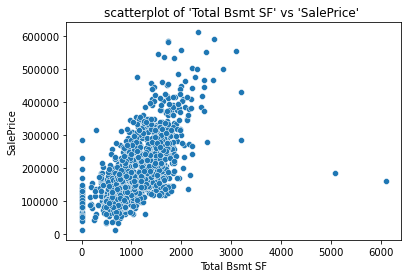

In [113]:
sns.scatterplot(data=train, x='Total Bsmt SF', y=train['SalePrice'])
plt.title("scatterplot of 'Total Bsmt SF' vs 'SalePrice' ")

Text(0.5, 1.0, "scatterplot of 'Total Bsmt SF' vs 'SalePrice' after removing outlier")

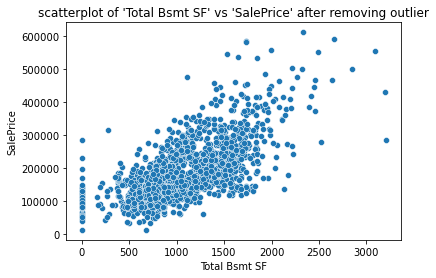

In [114]:
# decide to remove this outlier from this dataset for 'Total Bsmt SF'>4000
train.drop(train[train['Total Bsmt SF']>4000].index, axis=0, inplace=True)

# plot scatterplot after removing this outlier
sns.scatterplot(data=train, x='Total Bsmt SF', y=train['SalePrice'])
plt.title("scatterplot of 'Total Bsmt SF' vs 'SalePrice' after removing outlier")

Text(0.5, 1.0, "boxplot of 'SalePrice'")

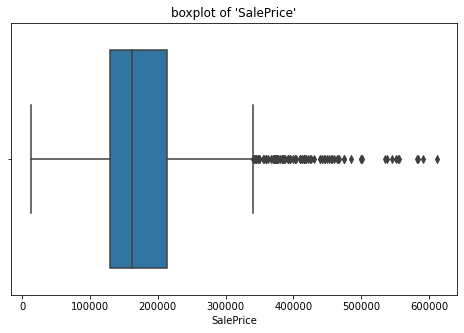

In [115]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SalePrice', data=train)
plt.title("boxplot of 'SalePrice'")

In [116]:
train.drop(train[train['SalePrice']>580000].index, axis=0, inplace=True)

In [117]:
# shape of the train dataset after removing outliers
train.shape

(2044, 79)

### 8.Continuous Variables EDA & Inference

#### Correlation Matrix

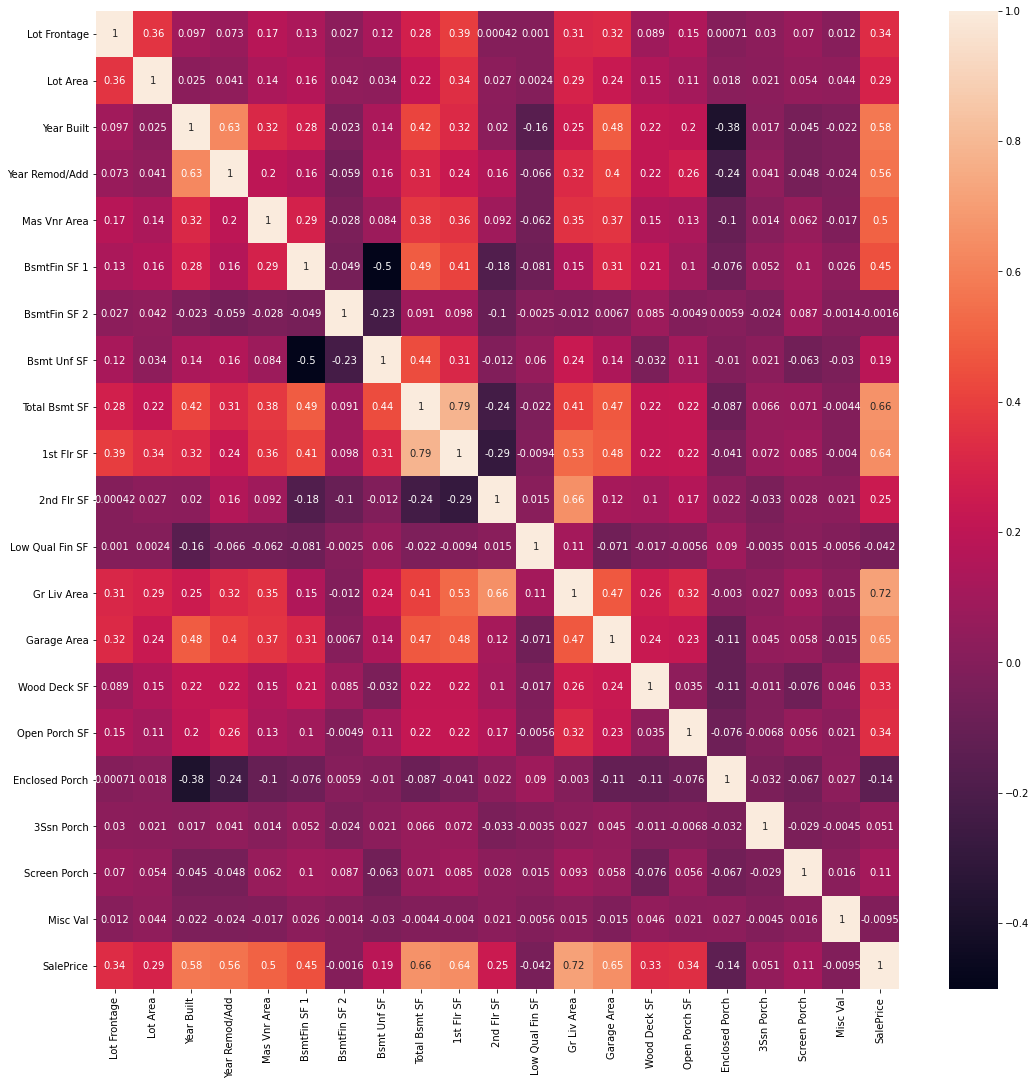

In [118]:
plt.figure(figsize=(18,18))
sns.heatmap(train[numeric_continuous].corr(), annot=True);

##### Inference from Correlation Matrix

1. 'Year Remodel/Add' seem to have a high correlation to 'Year Built' based on the light colours in the correlation matrix.If the house is new, the year it is built will be the same year it is added.

2. 'Total Bsmt SF' seem to have a high correlation to '1st Flr SF' based on the light colours in the correlation matrix.As basement is below the house, the 1st flr squarefeet will be similar to the basement

3. 'Gr Liv Area'seem to have a high correlation to '2nd Flr SF' based on the light colours in the correlation matrix. 'Gr Liv Area' refers to above ground level living area, hence refered to 2nd flr squarefeet

4. Based on this Correlation Matrix, 'Gr Liv Area' shows the strongest positive correlation based on the lightest color plot compared to 'Enclosed Porch' which negative correlation against 'SalePrice' based on the darkest plot

5. The variables showing the lighter colors in relation to 'SalePrice' might be good for predicting 'SalePrice'

In [119]:
# try to tabulate the correlation value
# ranking of variables

train[numeric_continuous].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
Gr Liv Area,0.717631
Total Bsmt SF,0.662023
Garage Area,0.652649
1st Flr SF,0.644690
Year Built,0.577443
Year Remod/Add,0.556084
Mas Vnr Area,0.503191
BsmtFin SF 1,0.448966
Open Porch SF,0.338047


In [120]:
train[numeric_continuous].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).index

Index(['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area',
       '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Open Porch SF', 'Lot Frontage', 'Wood Deck SF',
       'Lot Area', '2nd Flr SF', 'Bsmt Unf SF', 'Screen Porch', '3Ssn Porch',
       'BsmtFin SF 2', 'Misc Val', 'Low Qual Fin SF', 'Enclosed Porch'],
      dtype='object')

#### Pairplot with Regression line for Continuous Variables

In [121]:
# there are 21 continuous variables
len(numeric_continuous)

21

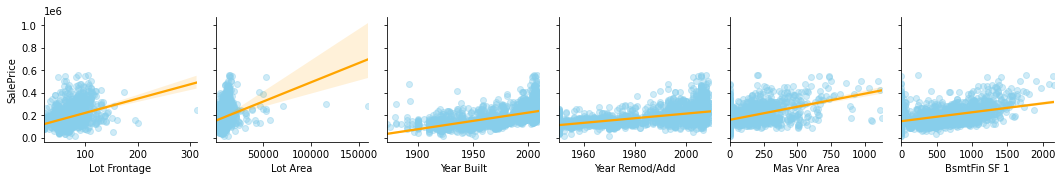

In [122]:
# change the parameters in pairplot to plot continuous variables row by row
# to compare the regression line plot against 'SalePrice'
# noticed the distribution of the points

sns.pairplot(train, x_vars=numeric_continuous[0:6] , y_vars='SalePrice', kind='reg',diag_kind = None, plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color':'skyblue','alpha': 0.4}})

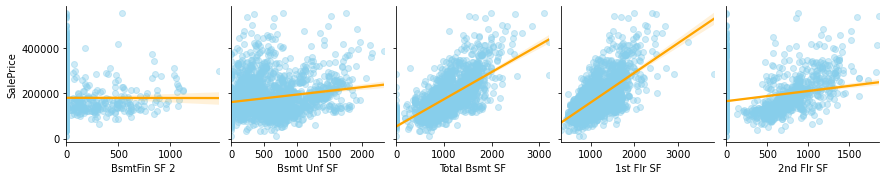

In [123]:
sns.pairplot(train, x_vars=numeric_continuous[6:11] , y_vars='SalePrice',diag_kind = None, kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color':'skyblue','alpha': 0.4}})

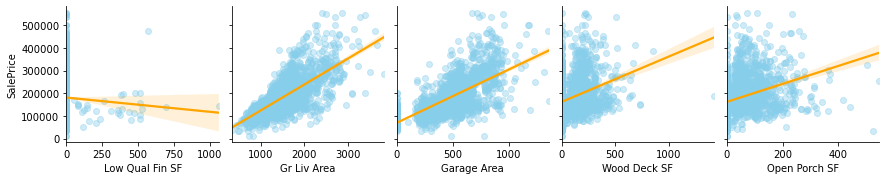

In [124]:
sns.pairplot(train, x_vars=numeric_continuous[11:16] , y_vars='SalePrice', kind='reg',diag_kind = None, plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color':'skyblue','alpha': 0.4}})

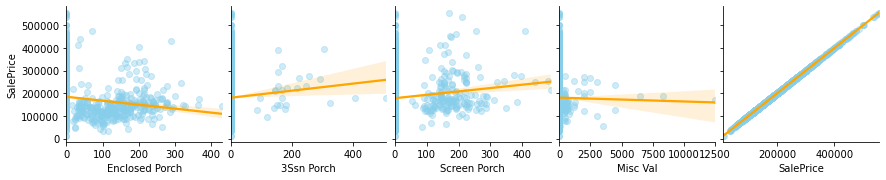

In [125]:
sns.pairplot(train, x_vars=numeric_continuous[16:21] , y_vars='SalePrice', kind='reg',diag_kind = None, plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color':'skyblue','alpha': 0.4}})

##### Inference from sns.pairplot with regression line
- if the gradient of the regression line is positive, it seems to signal a positive correlation with 'SalePrice'
- if the gradient of the regression line looks near zero, the variable will not be helpful in predicting 'SalePrice'
- noticed that many scatterpoints are value zero, will need to visualise the distribution of the variable

#### Displot for Continuous Variables

In [126]:
def displot_rows(my_list):
    fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(28,12))
    ax = ax.ravel()
    for i, column in enumerate(my_list):
        sns.histplot(ax=ax[i], data=train[column])
        ax[i].set_title(f'histplot of {column}')  

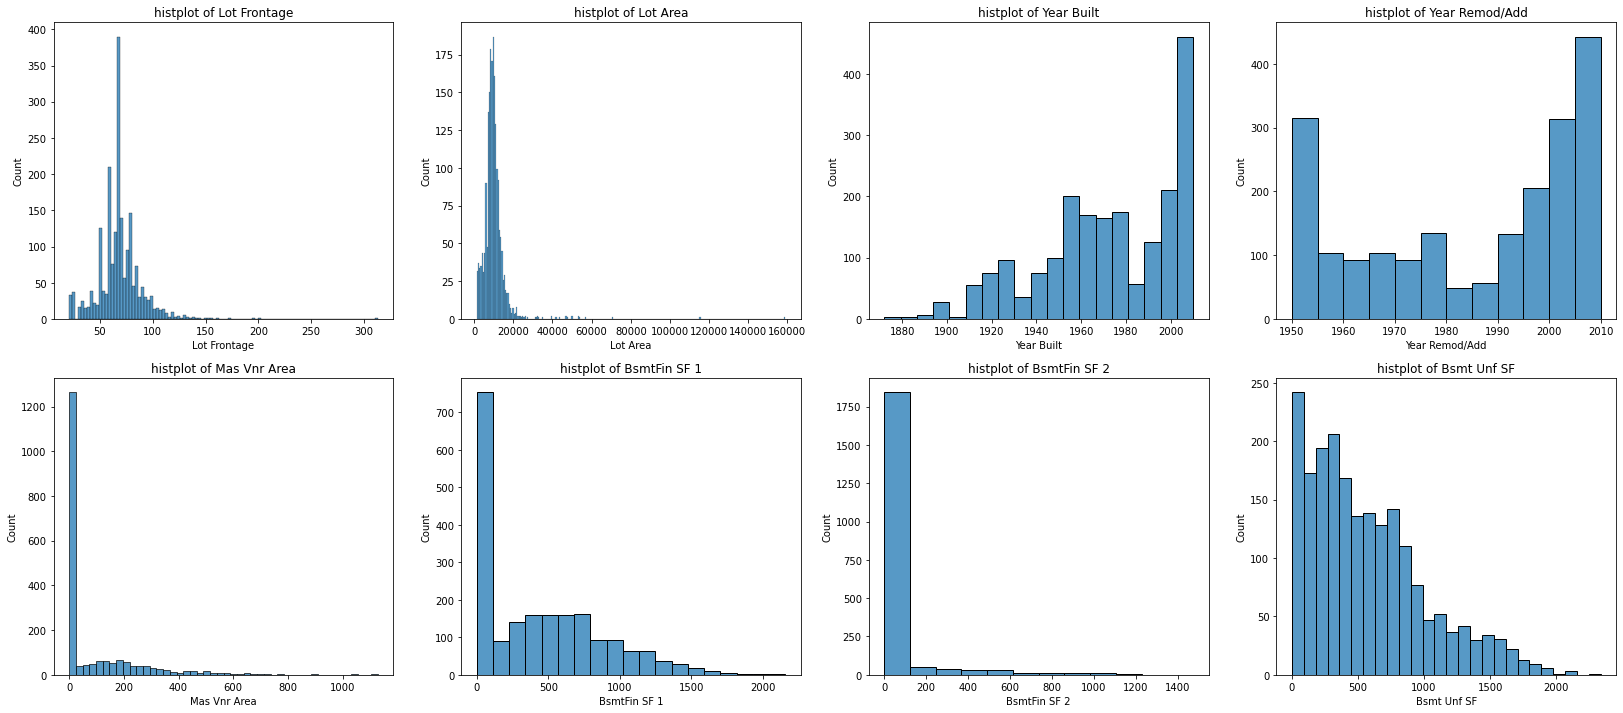

In [127]:
displot_rows(numeric_continuous[0:8])

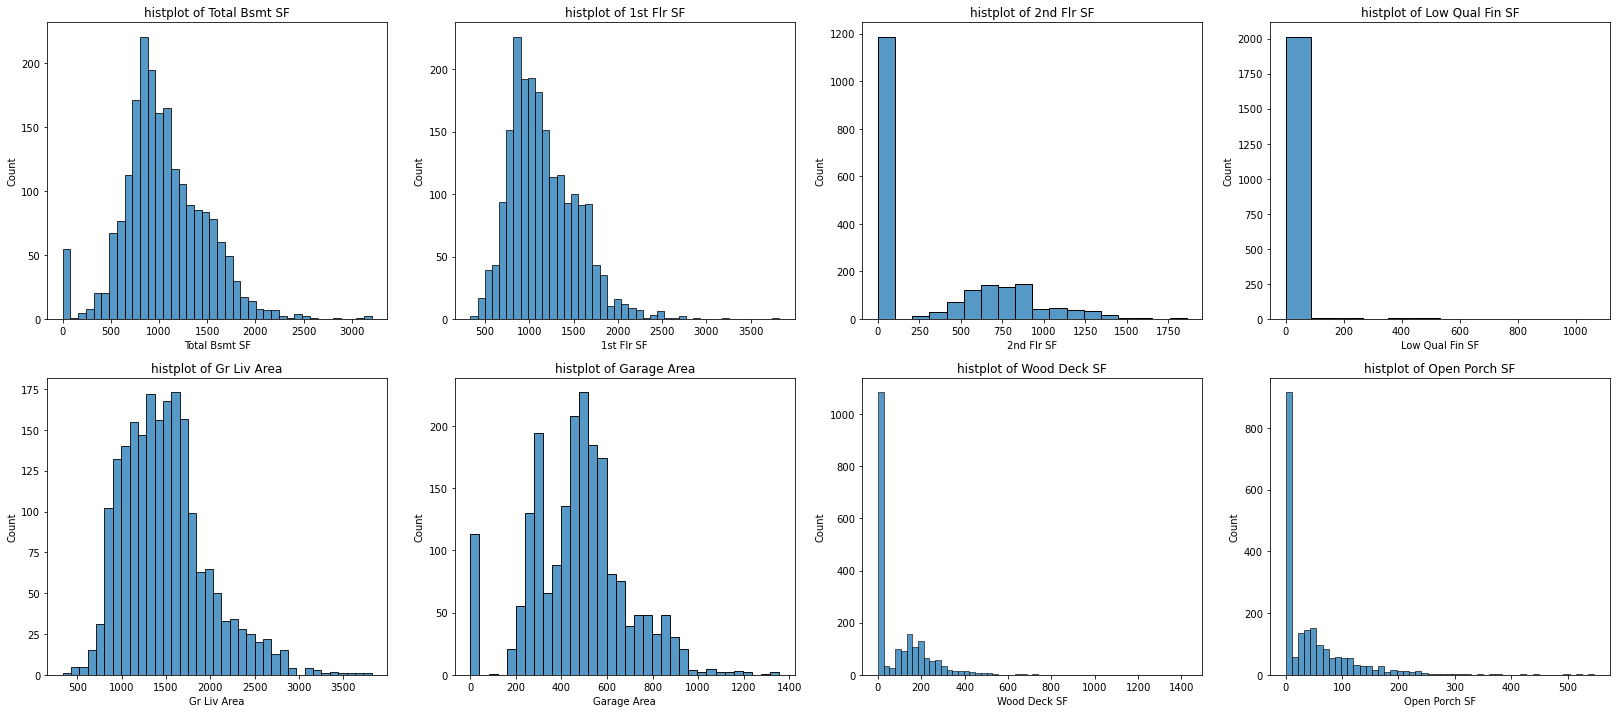

In [128]:
displot_rows(numeric_continuous[8:16])

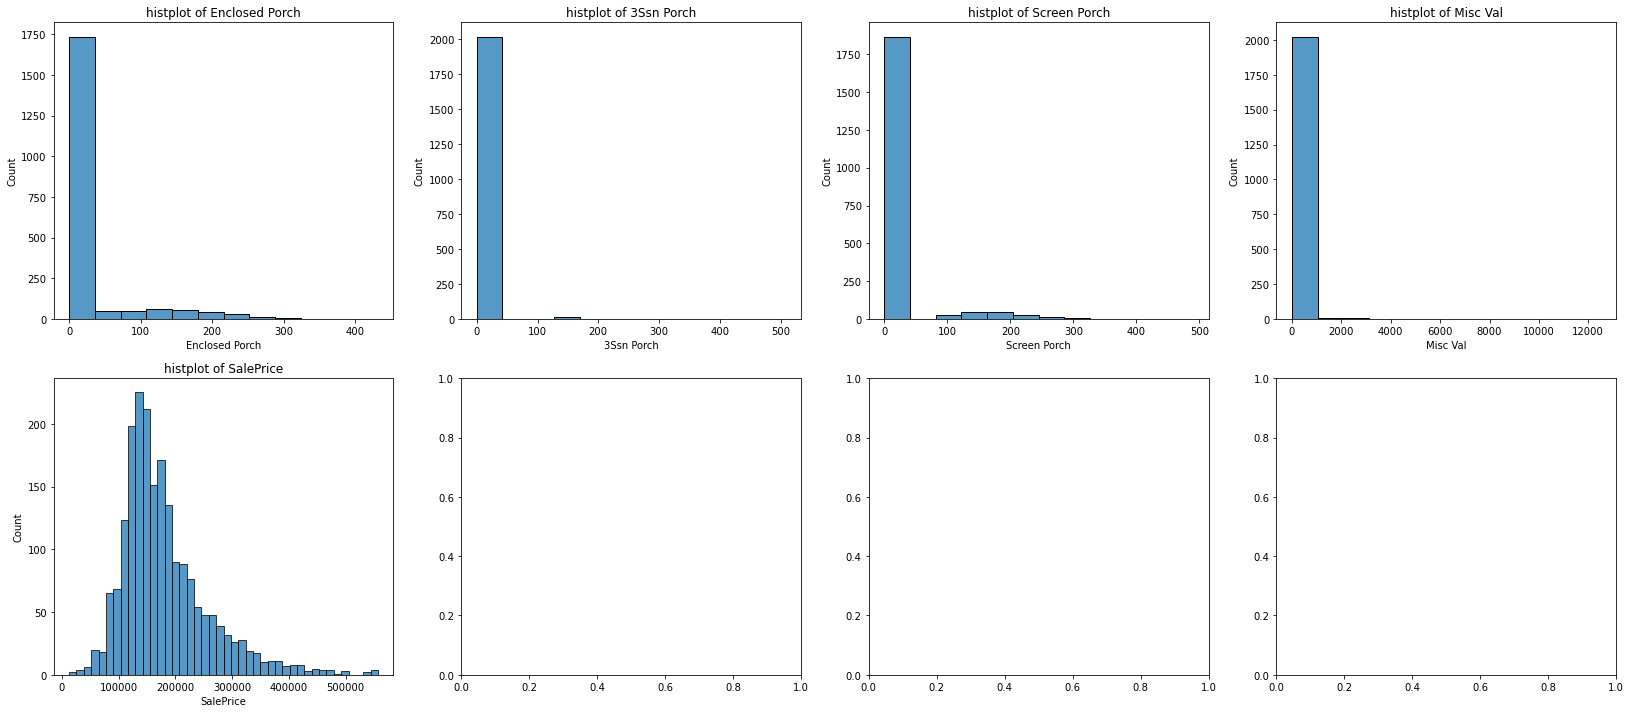

In [129]:
displot_rows(numeric_continuous[16:22])

In [130]:
numeric_continuous

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Misc Val',
 'SalePrice']

##### Inference from sns.pairplot with regression line
- Variables like 'Low Qual Fin SF''Wood Deck SF','Enclosed Porch','3Ssn Porch','Screen Porch','Misc Val' has high frequency of 0 in their columns
- and may not be useful for prediction 'SalePrice' as compared to other variables.
- this is confirmed by checking what is the mode of each column

In [131]:
# checking the most common value in each variable
# there are many variables with 0!

for i in numeric_continuous:
    print(f' Mode in {i} : {train[i].mode()[0]}')

 Mode in Lot Frontage : 68.0
 Mode in Lot Area : 9600
 Mode in Year Built : 2005
 Mode in Year Remod/Add : 1950
 Mode in Mas Vnr Area : 0.0
 Mode in BsmtFin SF 1 : 0.0
 Mode in BsmtFin SF 2 : 0.0
 Mode in Bsmt Unf SF : 0.0
 Mode in Total Bsmt SF : 0.0
 Mode in 1st Flr SF : 864
 Mode in 2nd Flr SF : 0
 Mode in Low Qual Fin SF : 0
 Mode in Gr Liv Area : 864
 Mode in Garage Area : 0.0
 Mode in Wood Deck SF : 0
 Mode in Open Porch SF : 0
 Mode in Enclosed Porch : 0
 Mode in 3Ssn Porch : 0
 Mode in Screen Porch : 0
 Mode in Misc Val : 0
 Mode in SalePrice : 130000


##### Overall Inference for Continuous variables
- for variables with both near 0 correlation to 'SalePrice' and high value count of 0 will not be useful for predicting SalePrice
- variables identified that could be used for prediction based on current inference: 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Year Remod/Add', 'Year Built',
    'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Lot Area'

### 9.Categorical & Ordinal Variables EDA & Inference

#### Boxplots for categorical & ordinal variables

In [133]:
# create a function to view boxplots in a row
# compare the boxplots across each row 

def boxplot_rows(my_list):
    fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(28,12), sharey=True)
    ax = ax.ravel()
    for i, column in enumerate(my_list):
        sns.boxplot(ax=ax[i], x=column, y="SalePrice", data=train, palette='rainbow' )
        ax[i].set_title(f'Boxplot of {column} against SalePrice')   

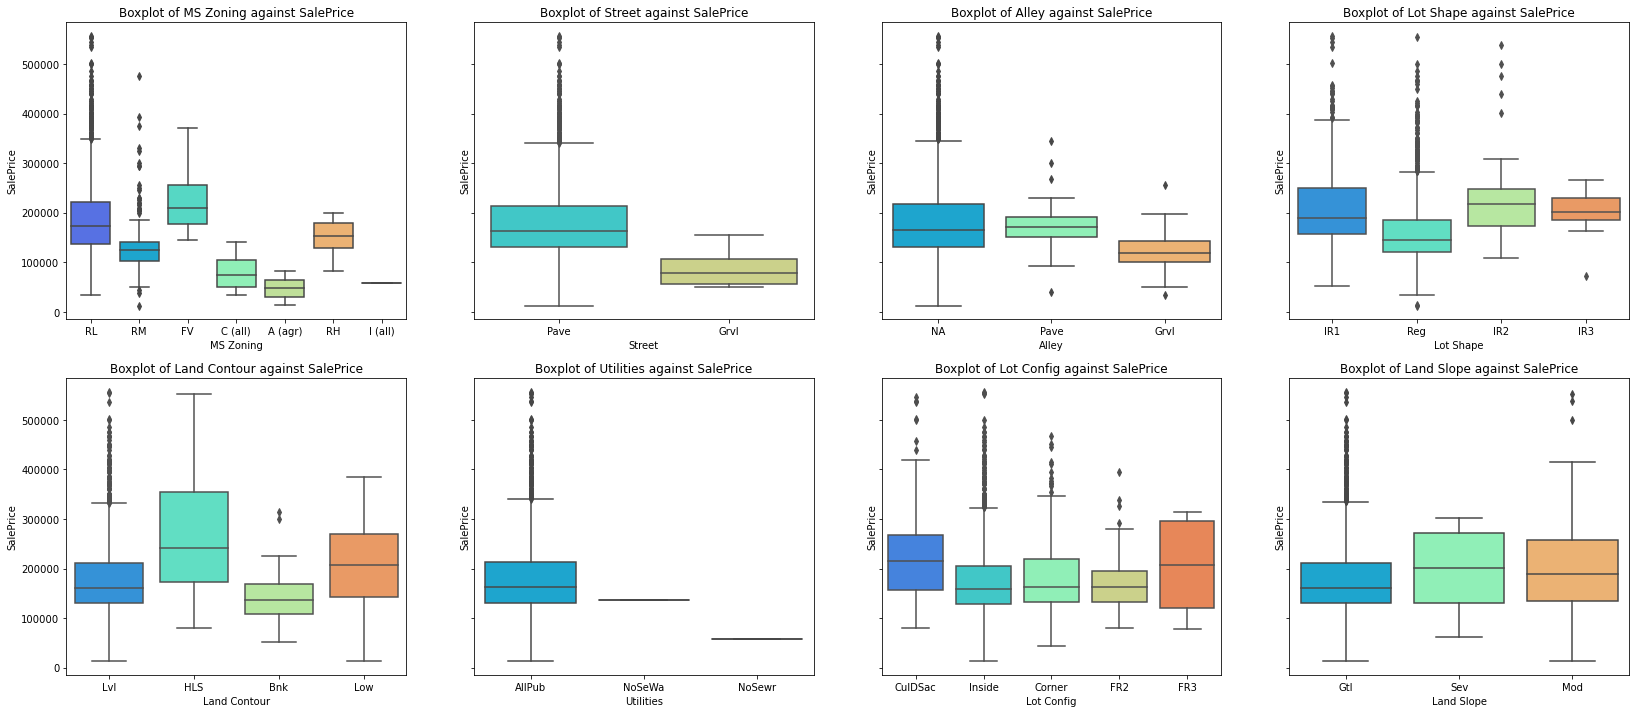

In [134]:
boxplot_rows(categorical_list[0:8])

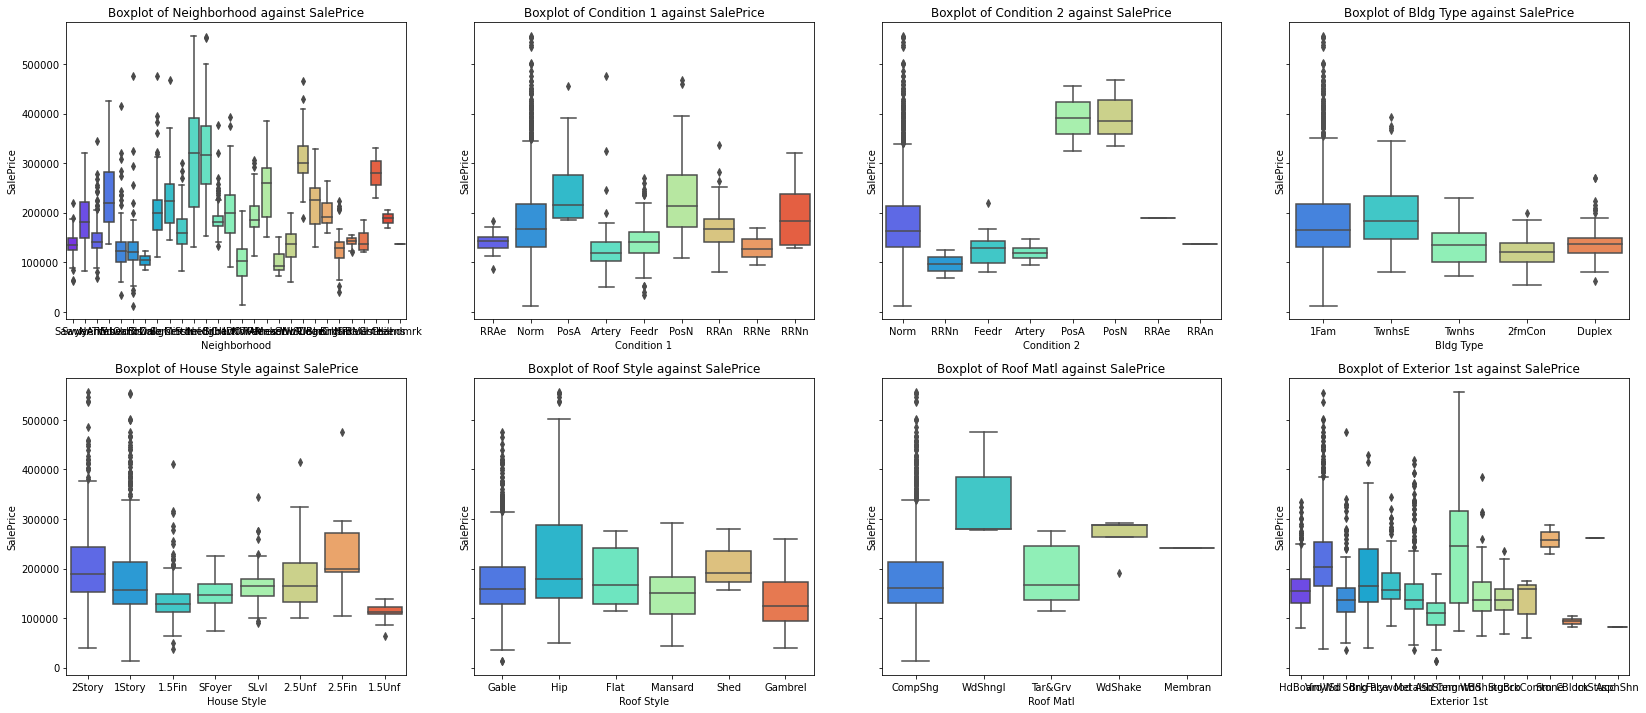

In [135]:
boxplot_rows(categorical_list[8:16])

In [136]:
def bigger_box_plot(category):
    plt.figure(figsize=(18,6))
    sns.boxplot(data=train, x=category, y='SalePrice', palette='rainbow')
    plt.title(f'Boxplot of different {category} against SalePrice', fontsize= 30)
    plt.xticks(rotation='vertical');

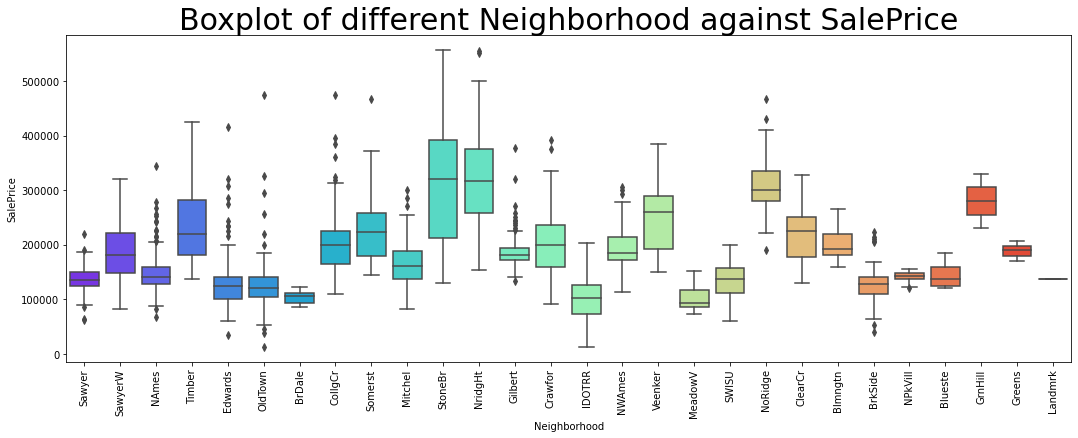

In [137]:
# plot a bigger boxplot as there are many categories inside this 'Neighborhood' column
bigger_box_plot('Neighborhood')

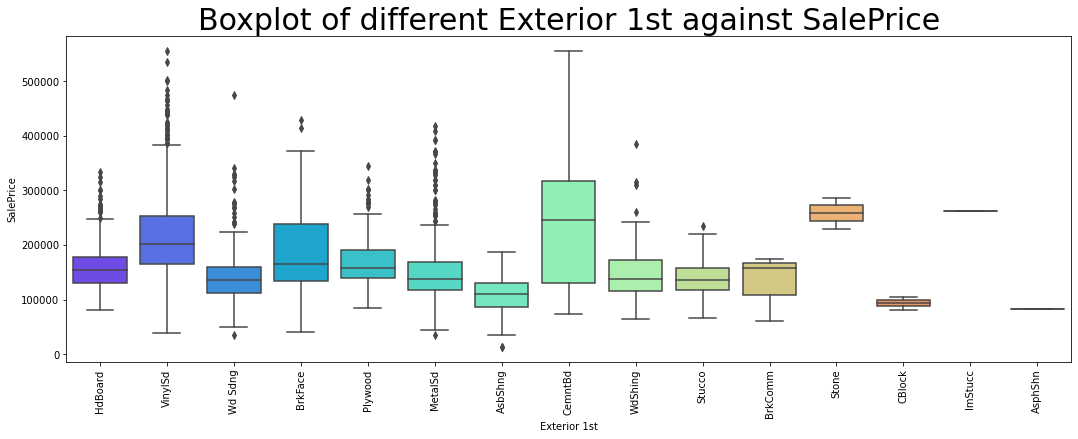

In [138]:
bigger_box_plot('Exterior 1st')

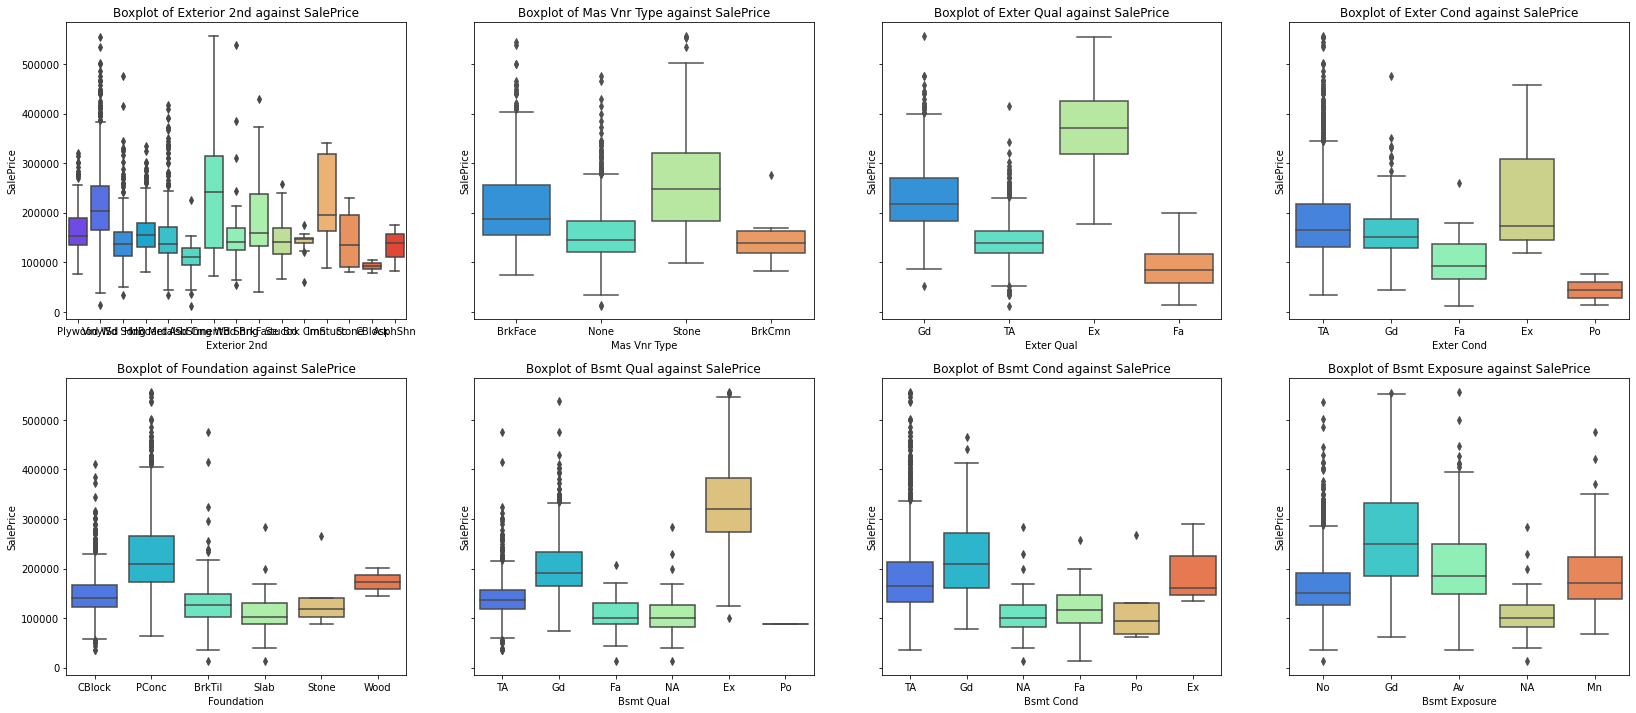

In [139]:
boxplot_rows(categorical_list[16:24])

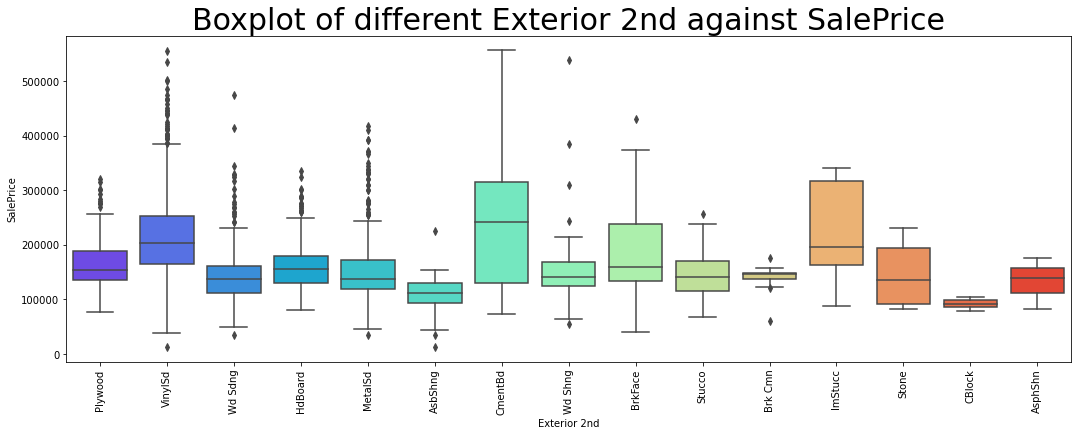

In [140]:
bigger_box_plot('Exterior 2nd')

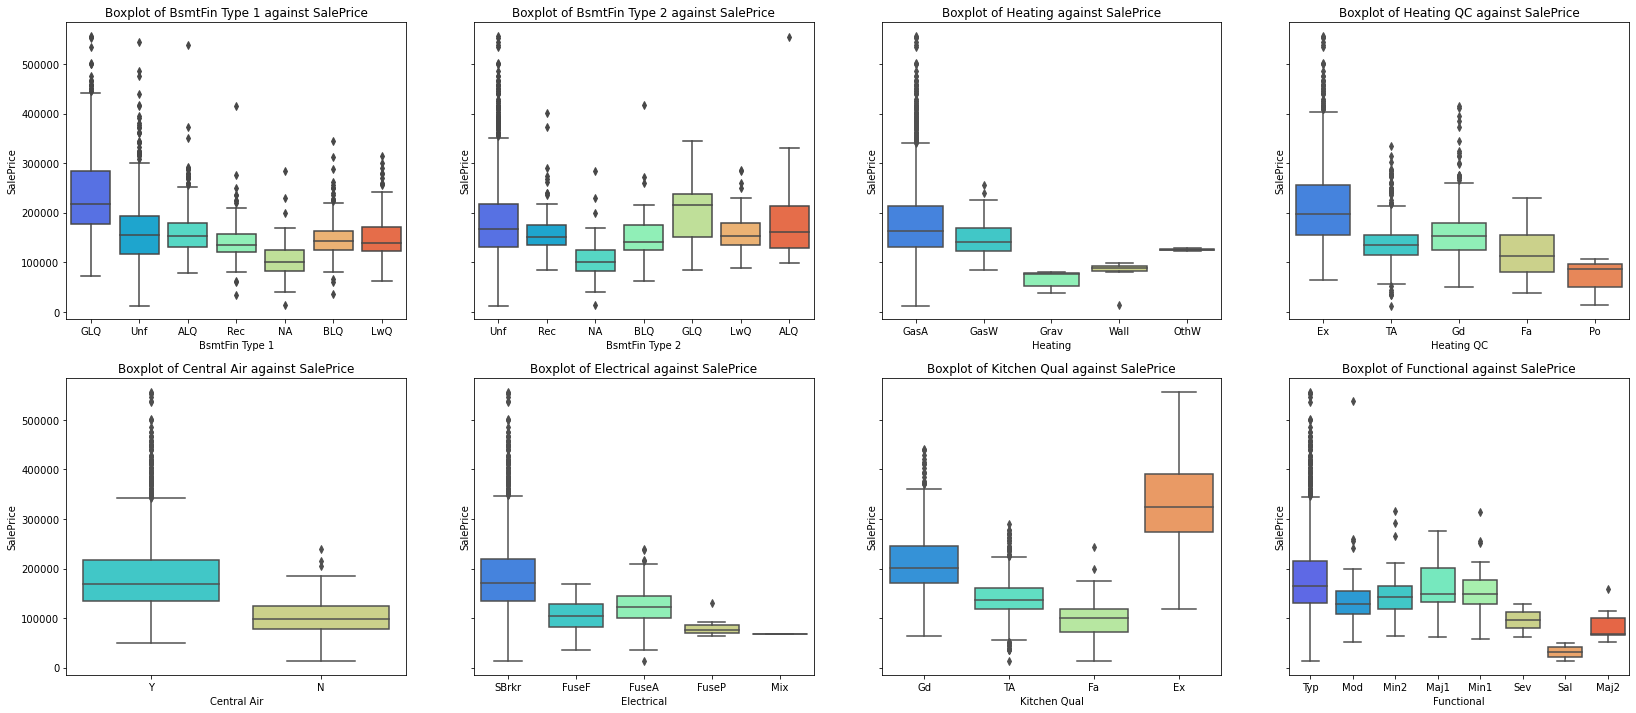

In [141]:
boxplot_rows(categorical_list[24:32])

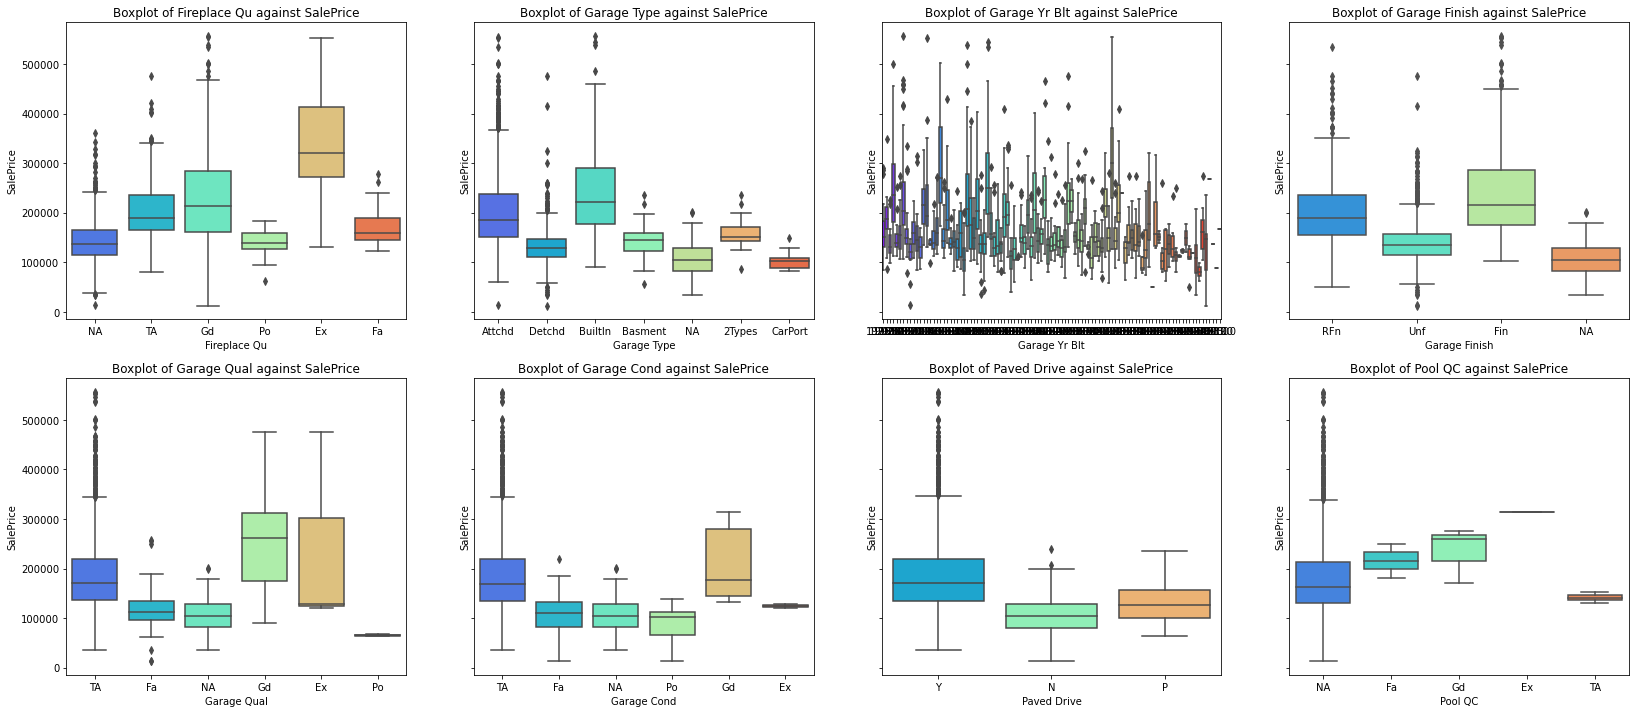

In [142]:
boxplot_rows(categorical_list[32:40])

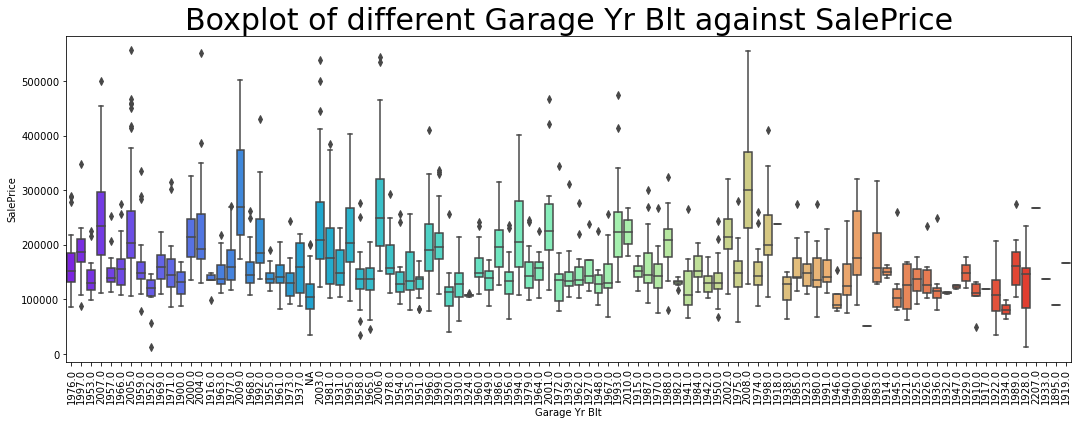

In [143]:
bigger_box_plot('Garage Yr Blt')

# checked that the 'Garage Yr Blt' is a discrete category in the data dictionary
# http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
# does not show any trend for increase or decrease in SalePrice with time

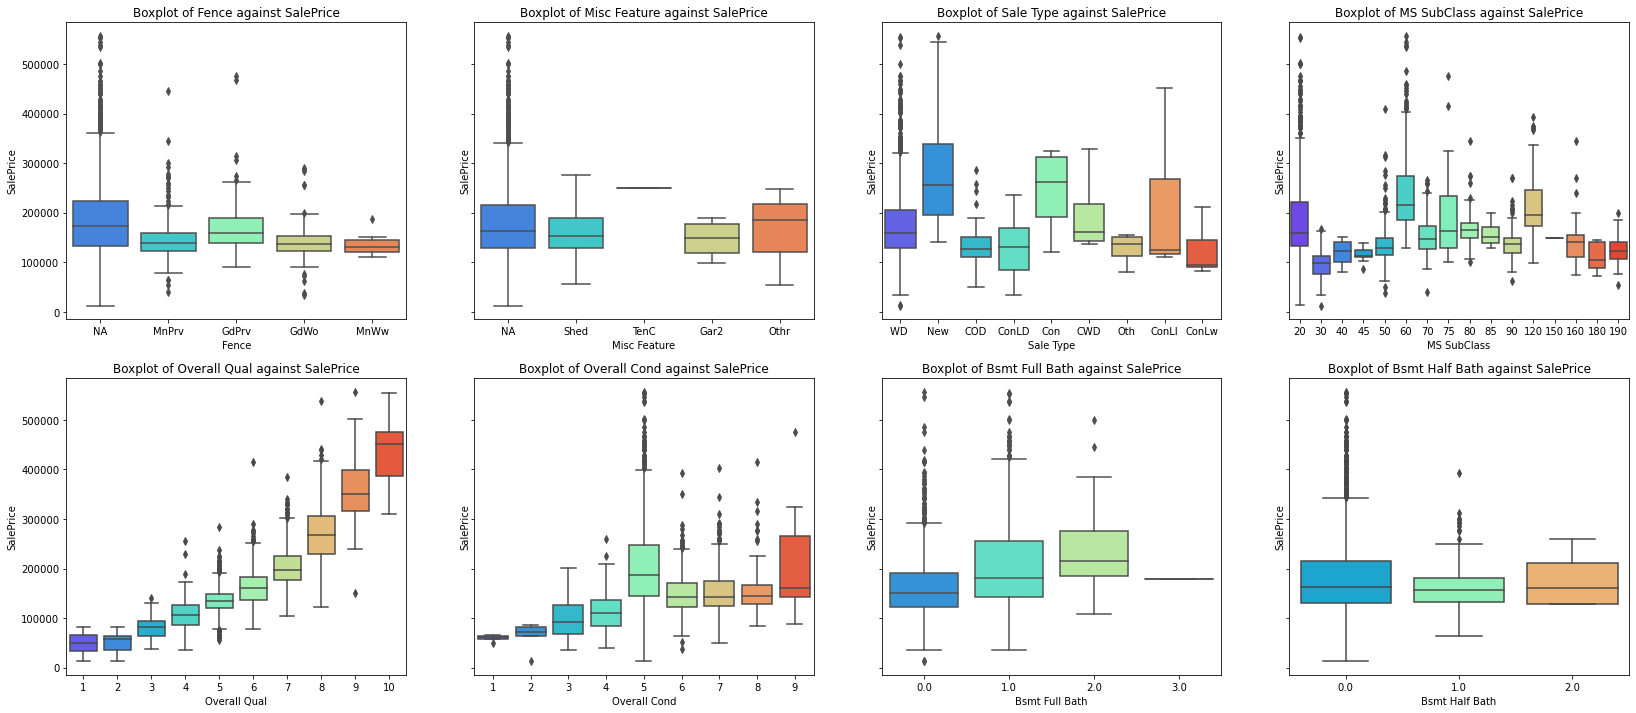

In [144]:
boxplot_rows(categorical_list[40:48])

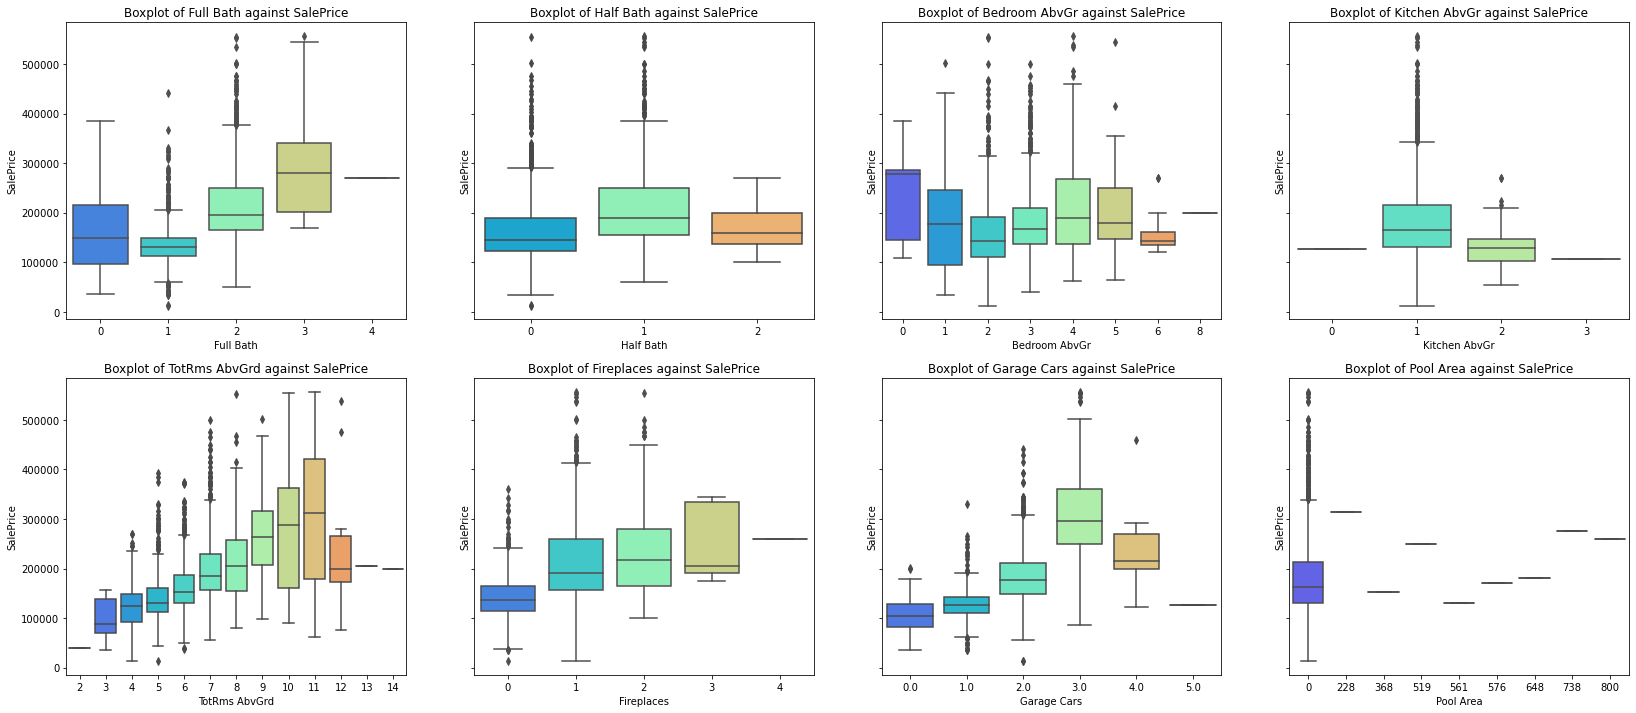

In [145]:
boxplot_rows(categorical_list[48:56])

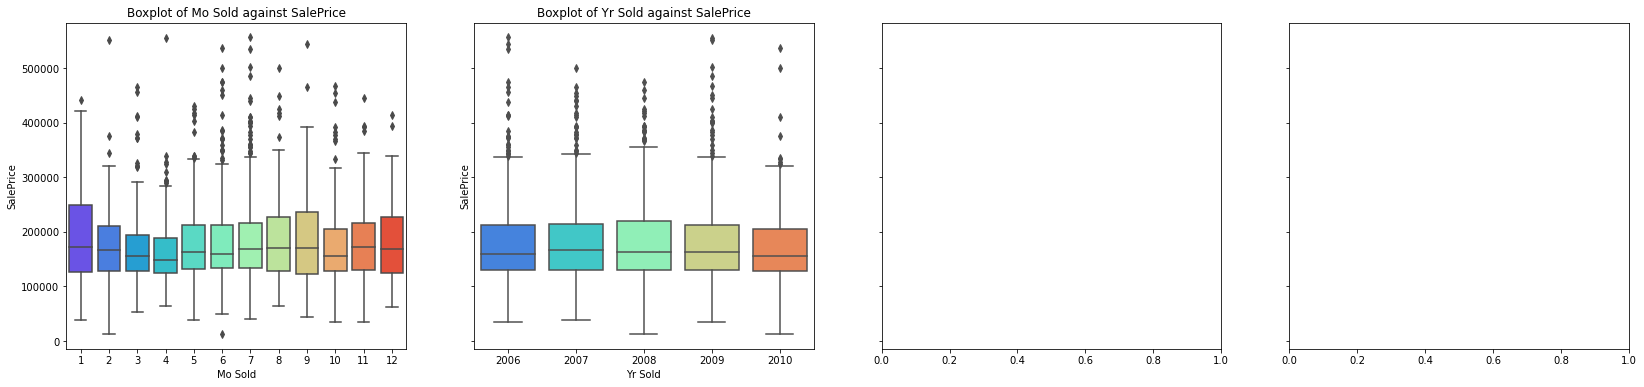

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28,6), sharey=True)
ax = ax.ravel()
for i, column in enumerate(categorical_list[56:58]):
    sns.boxplot(ax=ax[i], x=column, y="SalePrice", data=train, palette='rainbow')
    ax[i].set_title(f'Boxplot of {column} against SalePrice')   

##### Inference from boxplot of categorical & ordinal variables
- There are a ordinal & categorical variables that are have boxplots in the same range, meaning that different category/ordinal will not be useful in predicting 'SalePrice'
- Ordinal columns like 'Overall Qual' has distinct boxplots and can be useful for predicting 'SalePrice'
- The box in the boxplots show the interquartile range, while the whiskers show the (Q0 to Q1) and (Q3 to Q4) range. the dots actually showed the outliers, decided not to remove outliers for every boxplots as it may remove alot of rows and affect the prediction.

### Violinplots for categorical variables

In [166]:
# violin plot also helps to show the distribution of data
def violinplot_rows(my_list):
    fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(28,12), sharey=True)
    ax = ax.ravel()
    for i, column in enumerate(my_list):
        sns.violinplot(ax=ax[i], x=column, y="SalePrice", data=train, palette='rainbow')
        ax[i].set_title(f'Boxplot of {column} against SalePrice')   

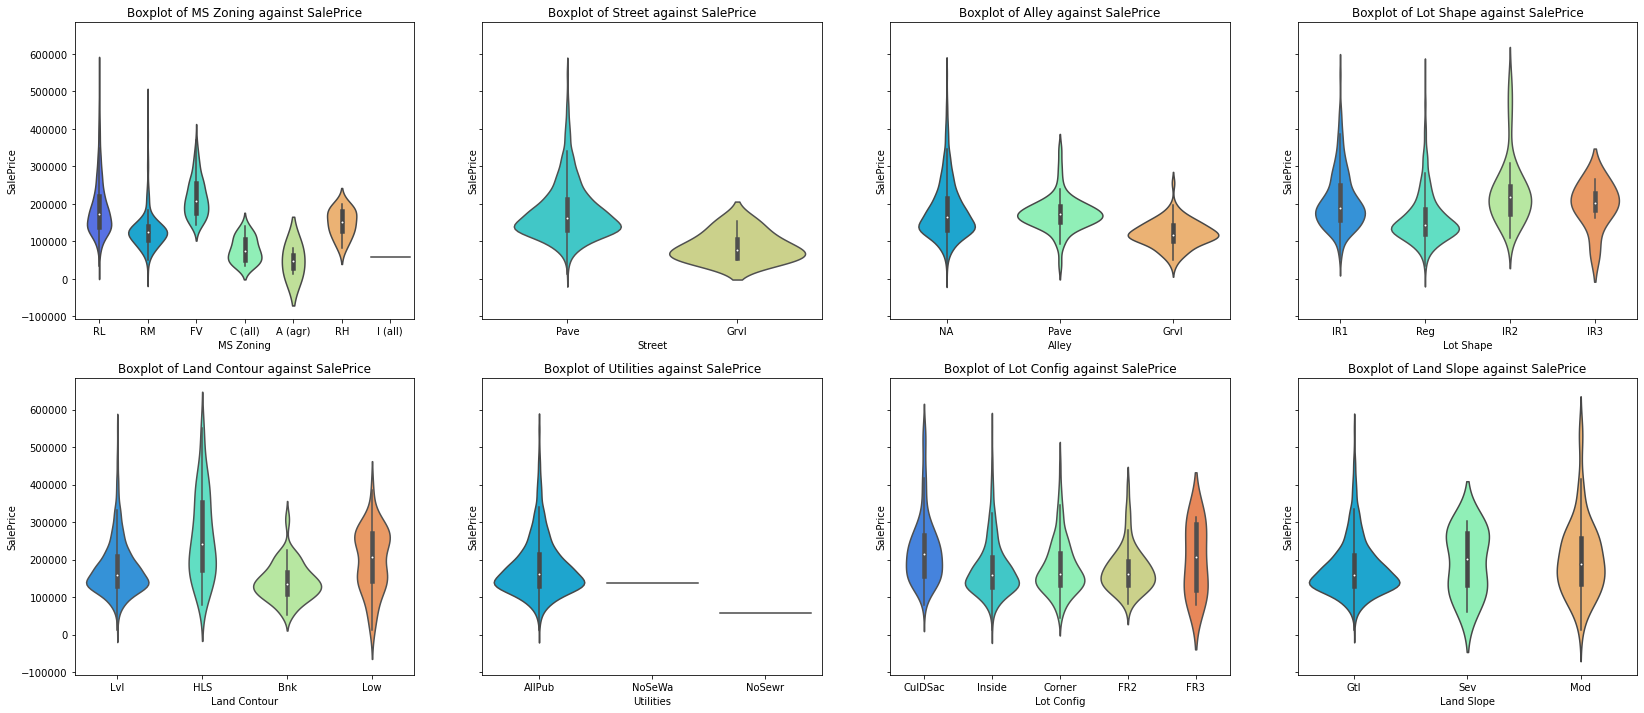

In [167]:
violinplot_rows(categorical_list[0:8])

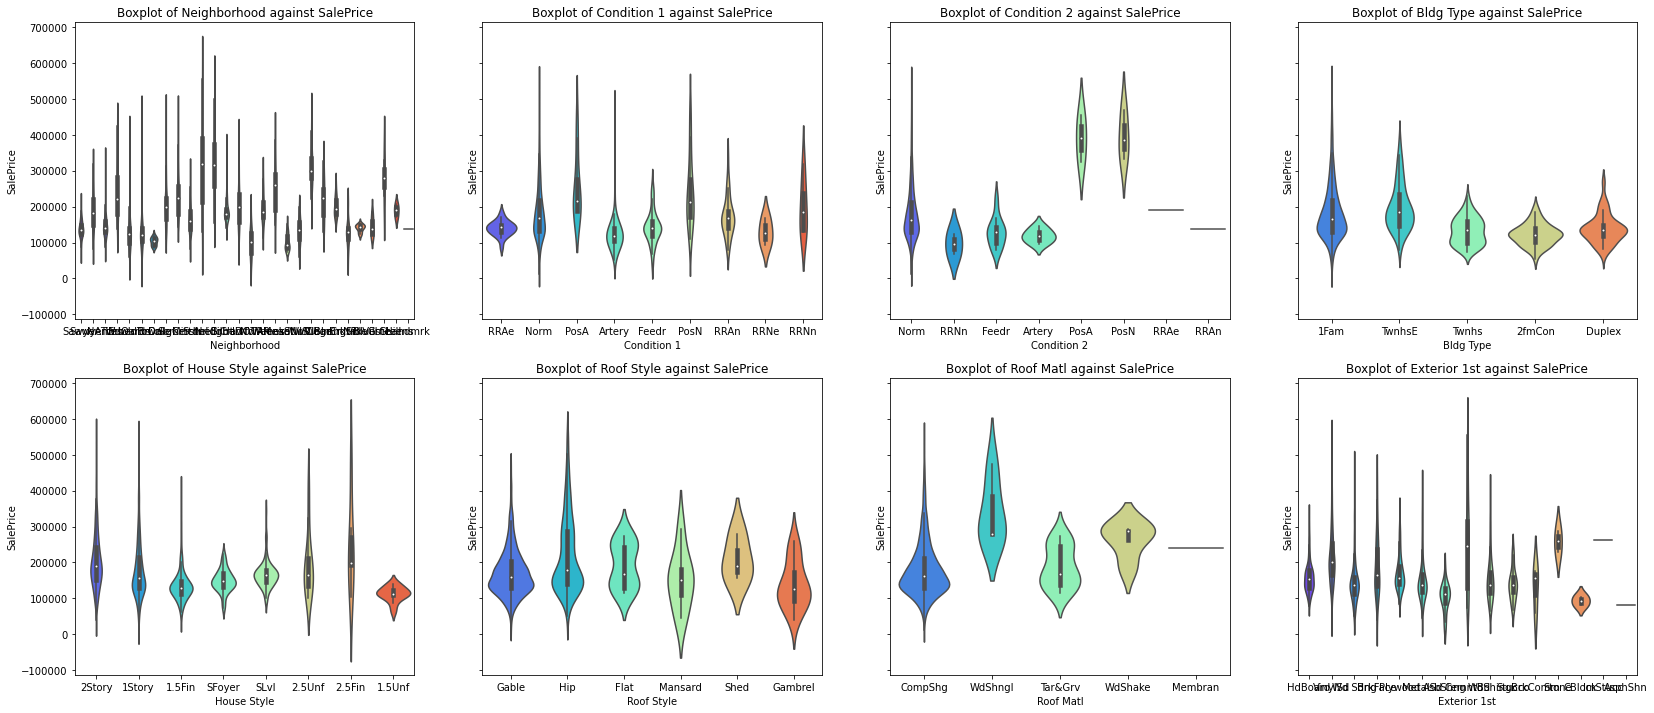

In [168]:
violinplot_rows(categorical_list[8:16])

In [169]:
# plotting a large plot for 'Neighborhood' as there are many categories

def bigger_violin_plot(category):
    plt.figure(figsize=(18,6))
    sns.violinplot(data=train, x=category, y='SalePrice', palette='rainbow')
    plt.title(f'Violinplot of different {category} against SalePrice', fontsize= 30)
    plt.xticks(rotation='vertical');

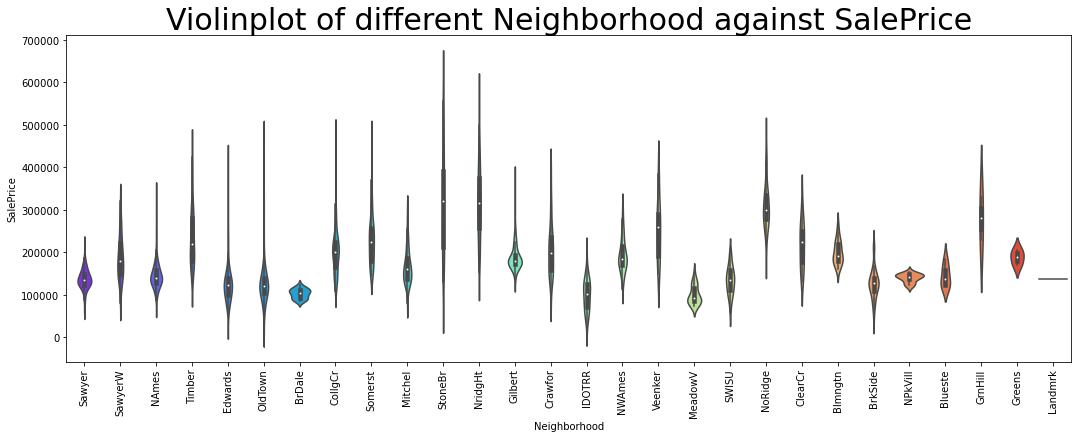

In [170]:
bigger_violin_plot('Neighborhood')

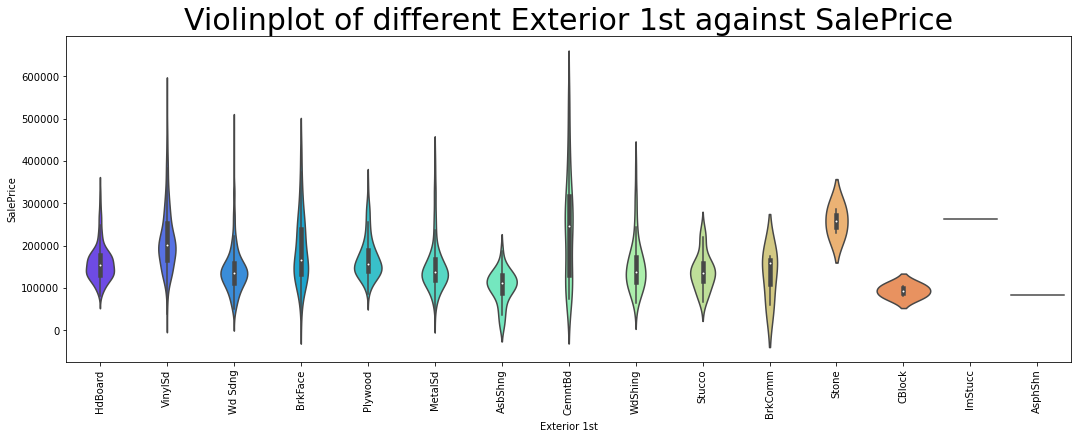

In [171]:
bigger_violin_plot('Exterior 1st')

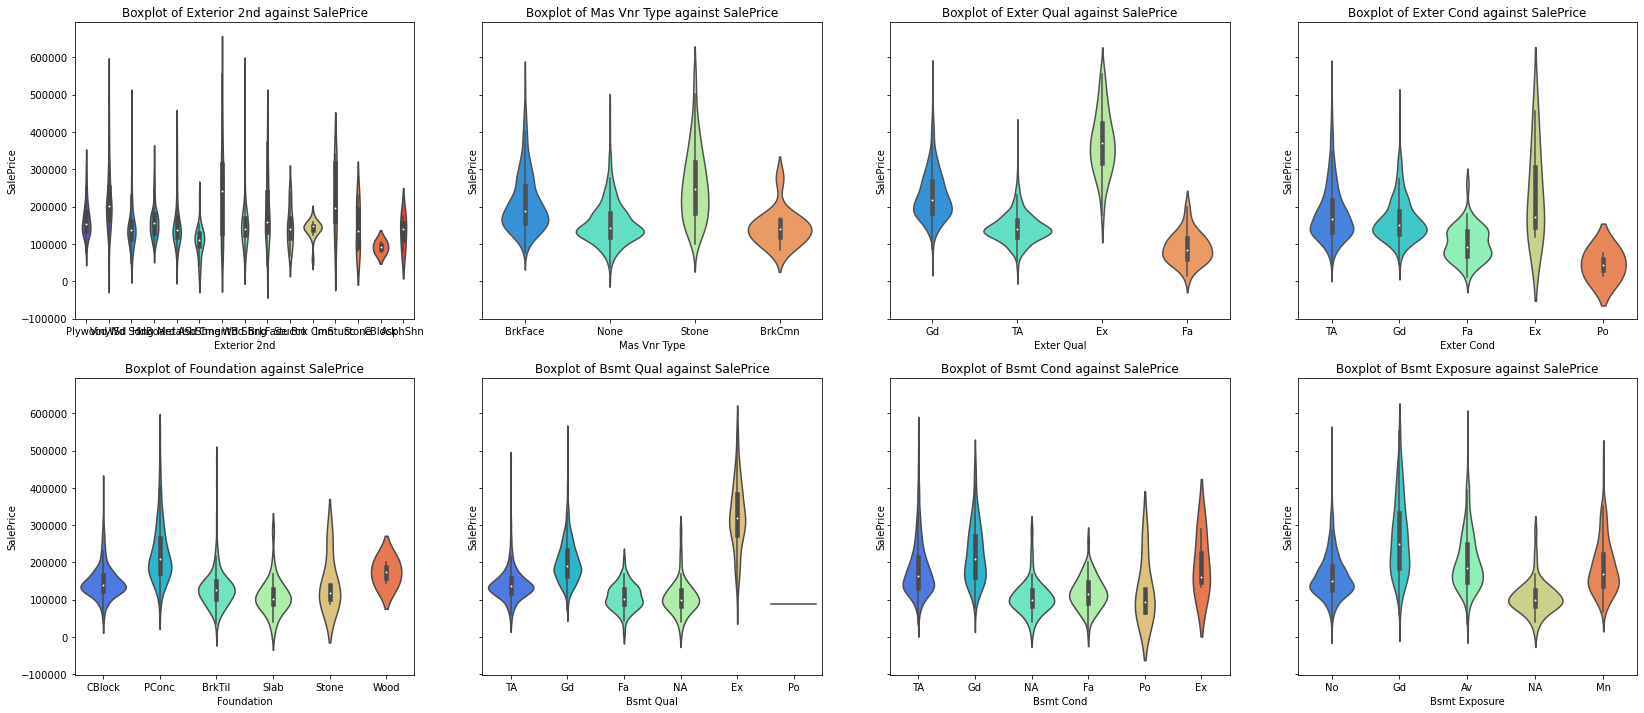

In [172]:
violinplot_rows(categorical_list[16:24])

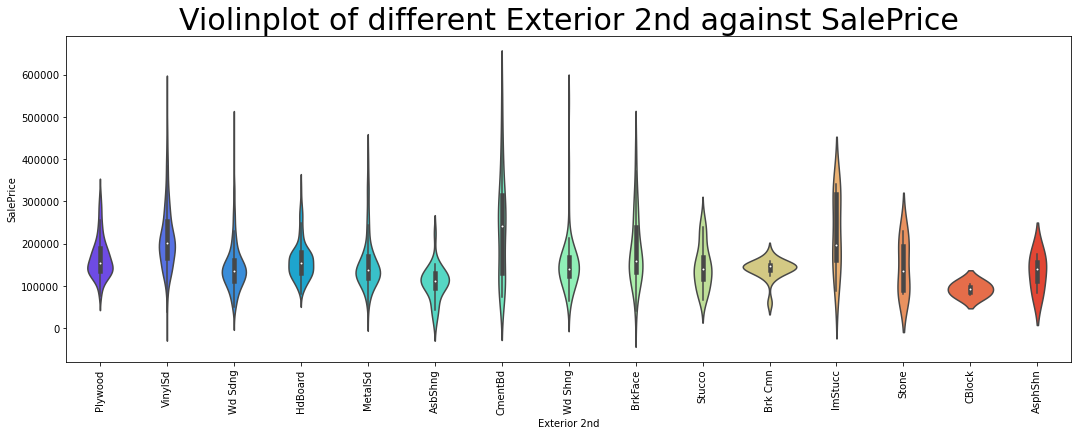

In [178]:
bigger_violin_plot('Exterior 2nd')

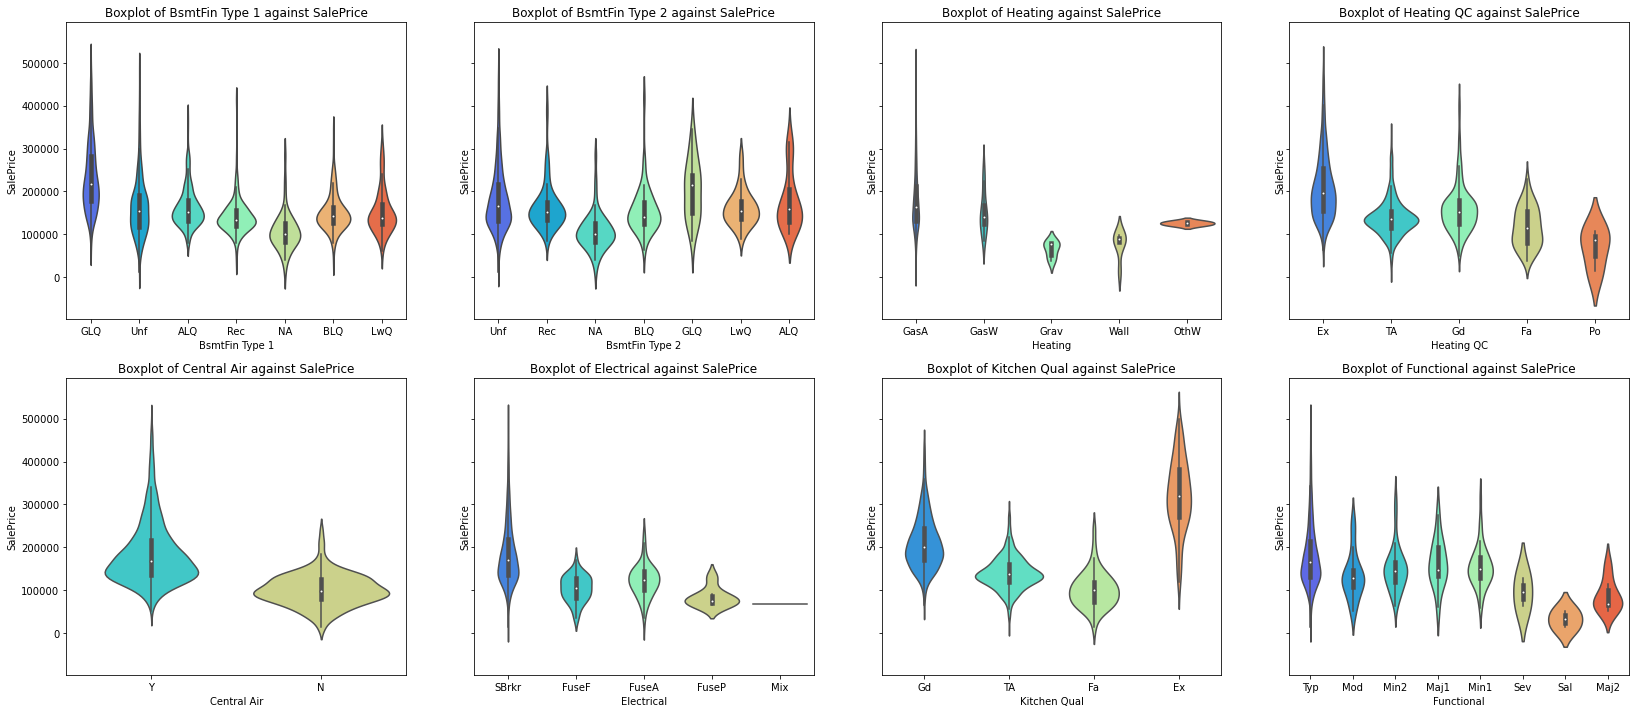

In [171]:
violinplot_rows(categorical_list[24:32])

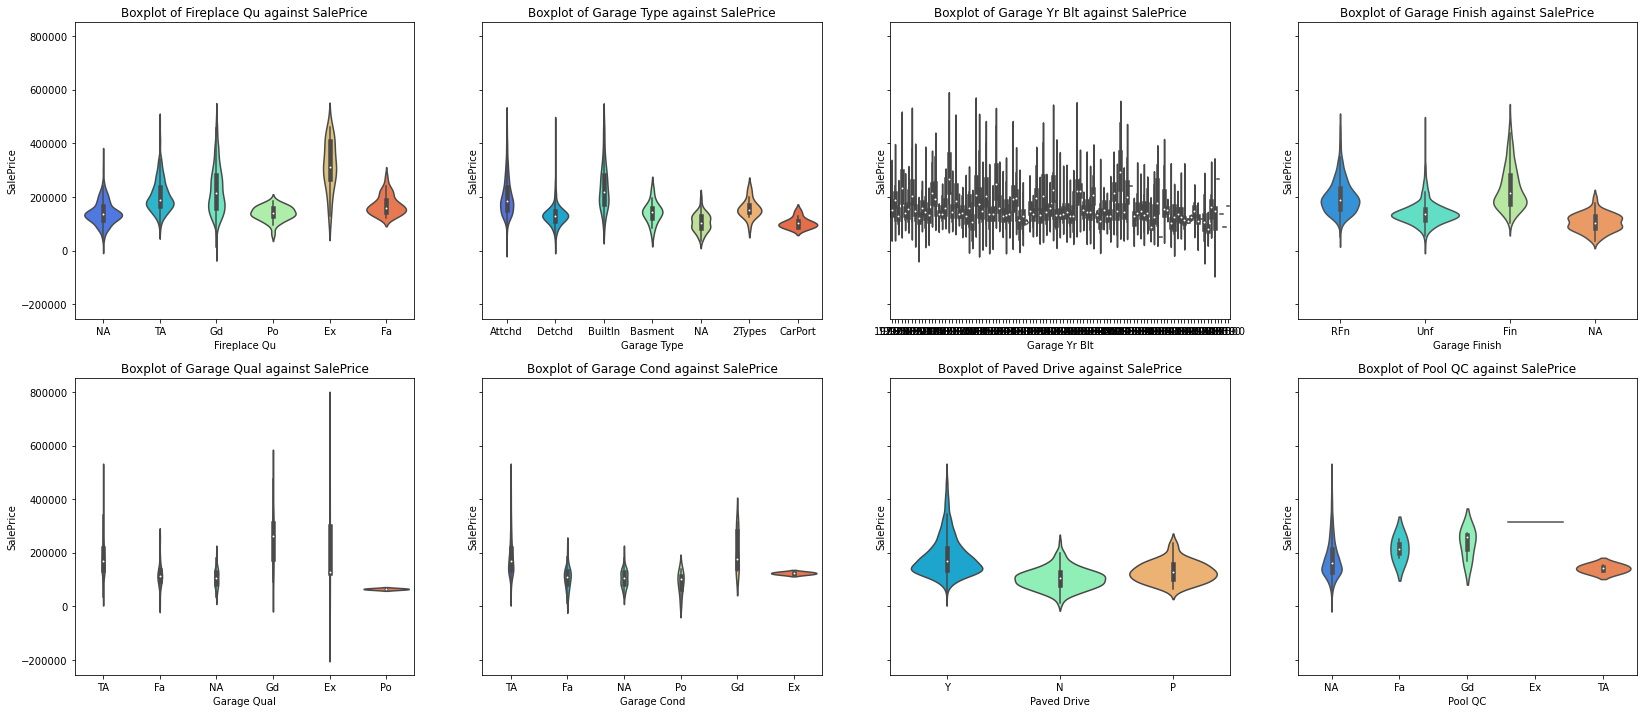

In [172]:
violinplot_rows(categorical_list[32:40])

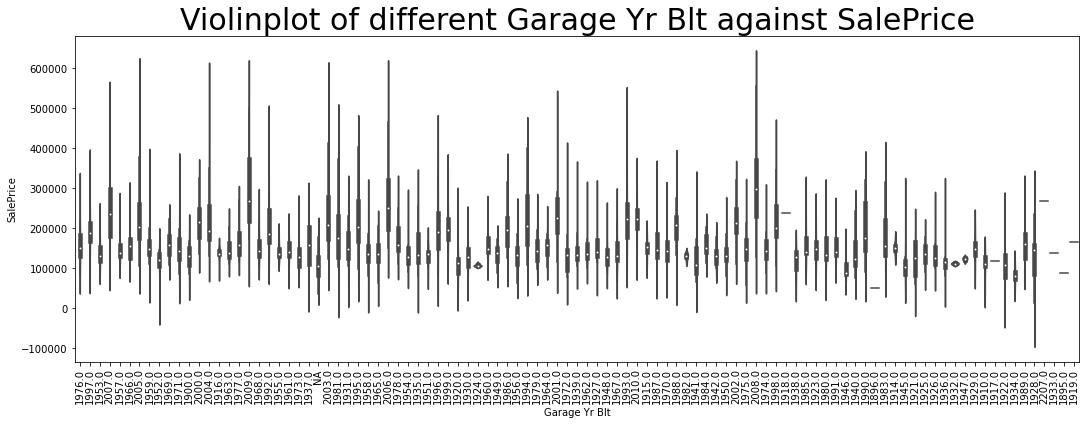

In [179]:
bigger_violin_plot('Garage Yr Blt')

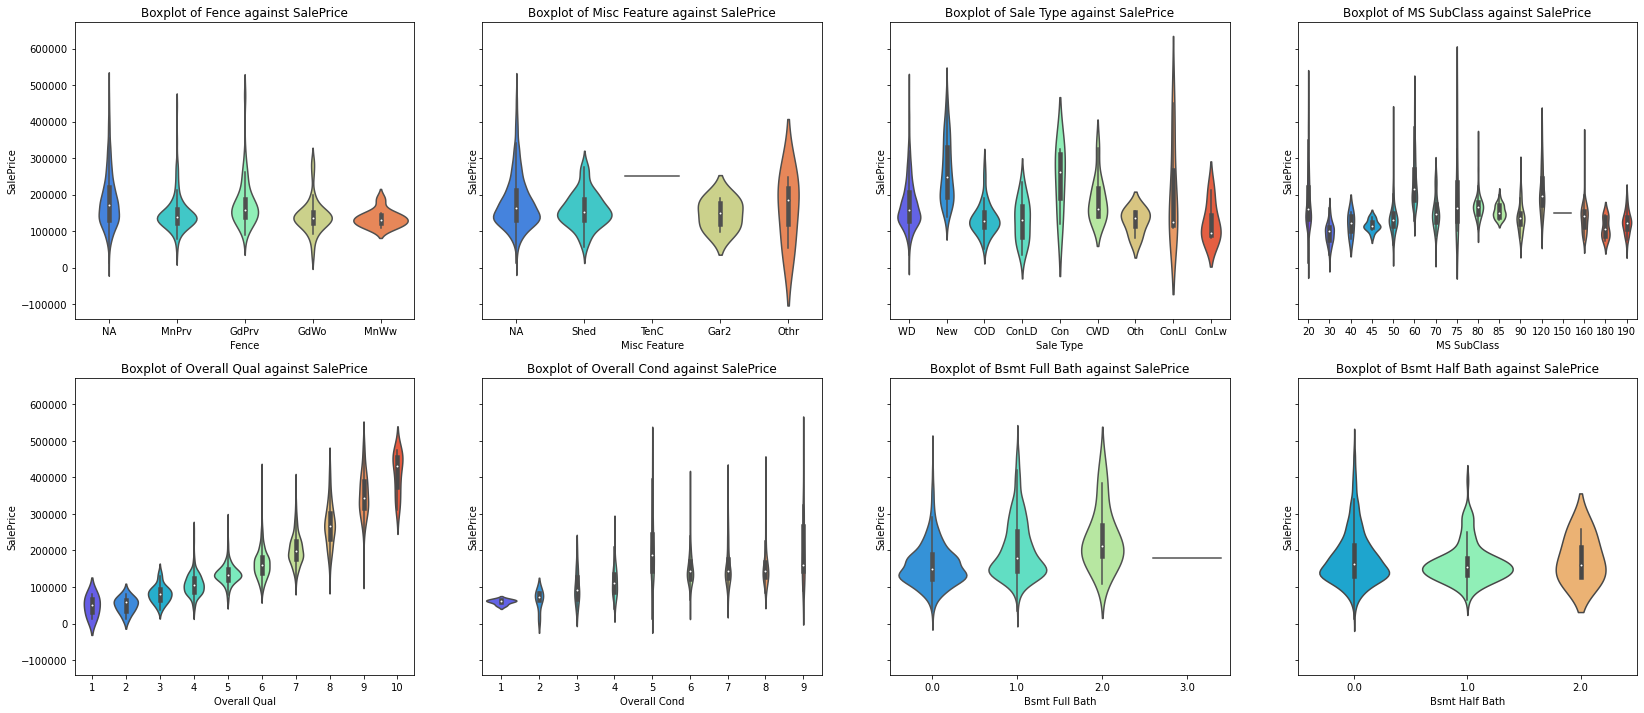

In [173]:
violinplot_rows(categorical_list[40:48])

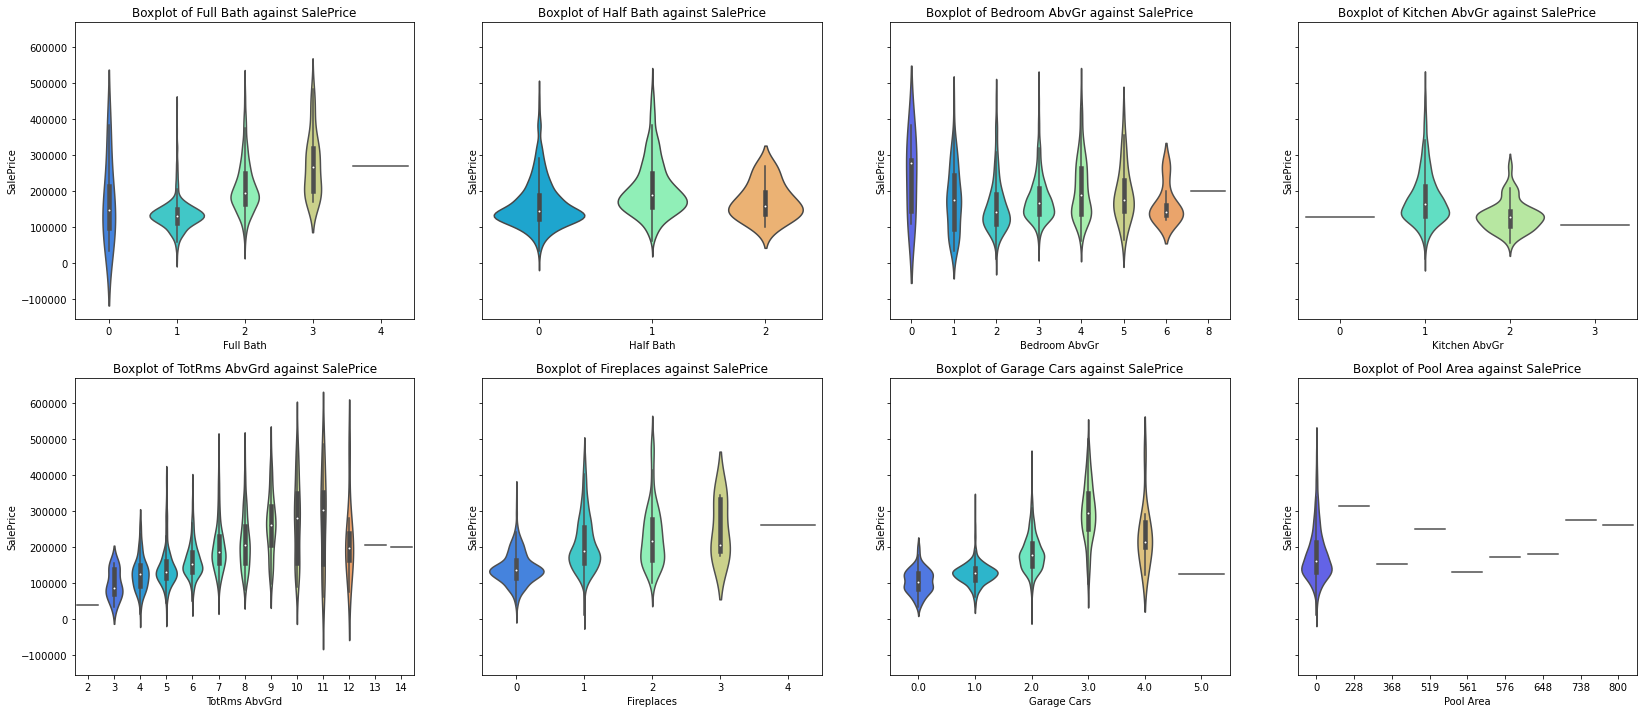

In [174]:
violinplot_rows(categorical_list[48:56])

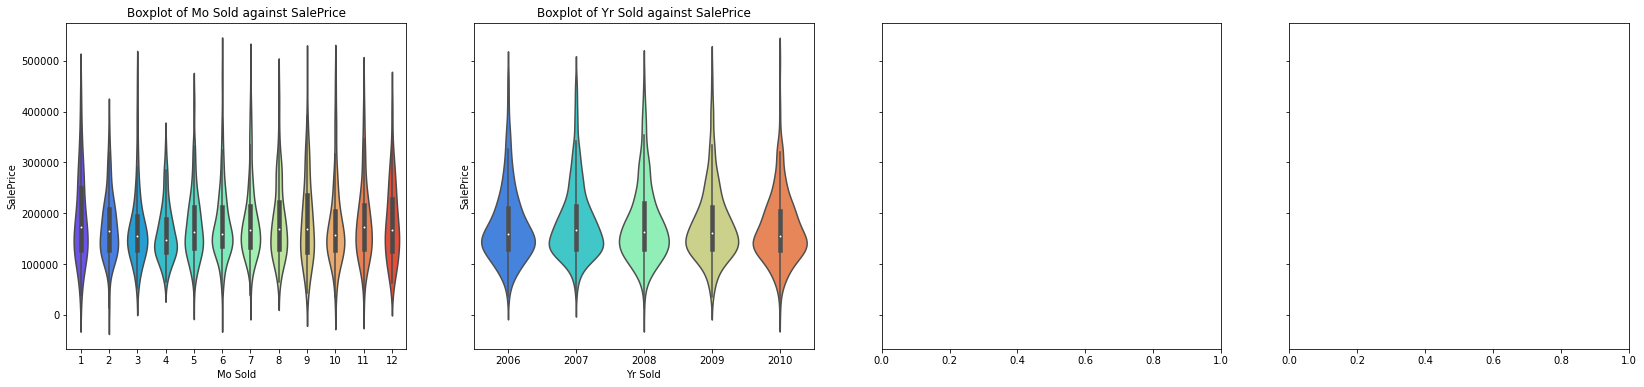

In [203]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28,6), sharey=True)
ax = ax.ravel()
for i, column in enumerate(categorical_list[56:58]):
    sns.violinplot(ax=ax[i], x=column, y="SalePrice", data=train, palette='rainbow')
    ax[i].set_title(f'Boxplot of {column} against SalePrice')  

##### Inference from violin plots for categorical & ordinal variables
- Violin plots help to show distribution of each category in the boxplot
- There are a few violin plots like 'Pool Area' where most of the houses were sold in 1 category, this will not be helpful in predicting 'SalePrice'
- There are a few violin plots like 'Exter Qual' which show different distributions at different prices, and might help in predicting 'SalePrice'


In [136]:
### finding the mode value for each columns in the categorical list

for i in categorical_list:
    print(f' Mode in {i} : {train[i].mode()[0]}')

 Mode in MS Zoning : RL
 Mode in Street : Pave
 Mode in Alley : NA
 Mode in Lot Shape : Reg
 Mode in Land Contour : Lvl
 Mode in Utilities : AllPub
 Mode in Lot Config : Inside
 Mode in Land Slope : Gtl
 Mode in Neighborhood : NAmes
 Mode in Condition 1 : Norm
 Mode in Condition 2 : Norm
 Mode in Bldg Type : 1Fam
 Mode in House Style : 1Story
 Mode in Roof Style : Gable
 Mode in Roof Matl : CompShg
 Mode in Exterior 1st : VinylSd
 Mode in Exterior 2nd : VinylSd
 Mode in Mas Vnr Type : None
 Mode in Exter Qual : TA
 Mode in Exter Cond : TA
 Mode in Foundation : PConc
 Mode in Bsmt Qual : TA
 Mode in Bsmt Cond : TA
 Mode in Bsmt Exposure : No
 Mode in BsmtFin Type 1 : GLQ
 Mode in BsmtFin Type 2 : Unf
 Mode in Heating : GasA
 Mode in Heating QC : Ex
 Mode in Central Air : Y
 Mode in Electrical : SBrkr
 Mode in Kitchen Qual : TA
 Mode in Functional : Typ
 Mode in Fireplace Qu : NA
 Mode in Garage Type : Attchd
 Mode in Garage Yr Blt : NA
 Mode in Garage Finish : Unf
 Mode in Garage Qual :

##### Overall inference from boxplot & violin plots of the categorical & ordinal data
- boxplot that show similar interquartile range may not help in predicting 'SalePrice'
- violin plots that show similar shapes and similar range may not help in predicting 'SalePrice'
- for Ordinal data that show similar plots and mode value is 'NA', they will not be considered for 'SalePrice' as they do not help in differenting between 'SalePrice'

### 10.Including an interaction column for 'age of house'

- checked that the 'Year Built' column was not able to show relationship with 'SalePrice' as well
- decided to add a column 'age of house' to show relationship with 'SalePrice'

In [147]:
# created a 'age of house' column inside train
train['age of house']=2021-train['Year Built']

# changes made to train must have corresponding change to test dataset too
test['age of house']=2021-test['Year Built']

Text(0.5, 1.0, "Regression plot of 'age of house' against 'SalePrice'")

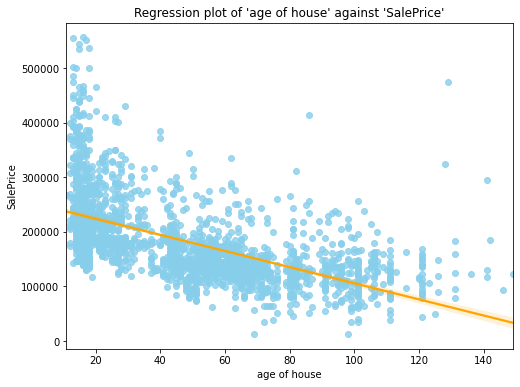

In [148]:
plt.figure(figsize=(8,6))
sns.regplot(x='age of house', y='SalePrice', scatter_kws={"color": "skyblue"}, line_kws={"color": "orange"}, data=train)
plt.title("Regression plot of 'age of house' against 'SalePrice'")

##### Inference from the sns.regplot of 'age of house' against 'SalePrice'
- there seem to be a negative correlation between the 'age of house' vs 'SalePrice'
- this might be useful when predicting 'SalePrice'

### 11.Mapping values to Ordinal columns

In [149]:
# mapping values to Ordinal columns on train set
train['Exter Qual'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
train['Exter Cond'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
train['Bsmt Qual'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
train['Bsmt Cond'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
train['Bsmt Exposure'].replace({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
train['BsmtFin Type 1'].replace({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
train['BsmtFin Type 2'].replace({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
train['Fireplace Qu'].replace({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [150]:
# mapping values to Ordinal columns on test set
# changes made to train set have to have corresponding changes to test set

test['Exter Qual'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
test['Exter Cond'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
test['Bsmt Qual'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
test['Bsmt Cond'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
test['Bsmt Exposure'].replace({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
test['BsmtFin Type 1'].replace({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
test['BsmtFin Type 2'].replace({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
test['Fireplace Qu'].replace({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

### 12.Choosing Features based on inference from EDA

##### Categorical & Ordinal columns that might help predict 'SalePrice' based on EDA

'MS Zoning',
'House Style',
'Roof Matl',
'Mas Vnr Type',
'Exter Qual',
'Bsmt Qual',
'Bsmt Cond',
'Overall Qual',
'Overall Cond',
'TotRms AbvGrd',
'Sale Type'

##### Numerical columns that might help predict 'SalePrice' based on EDA

'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF','age of house', 'Year Remod/Add', 'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1'

In [153]:
# assign to new name to export out of notebook
train_cleaned = train
test_cleaned = test

In [169]:
# choose the columns interested in predicting 'SalePrice'
# bring over 'SalePrice' columns too, so that

train_cleaned = train_cleaned[['MS Zoning','TotRms AbvGrd','House Style','Roof Matl','Mas Vnr Type','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','Overall Qual','Overall Cond','Bedroom AbvGr','Fireplace Qu','Garage Type','Fireplaces','Garage Cars','Sale Type','Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Year Remod/Add', 'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1','age of house','SalePrice']]
test_cleaned = test_cleaned[['MS Zoning','TotRms AbvGrd','House Style','Roof Matl','Mas Vnr Type','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','Overall Qual','Overall Cond','Bedroom AbvGr','Fireplace Qu','Garage Type','Fireplaces','Garage Cars','Sale Type','Gr Liv Area', 'Total Bsmt SF','Garage Area', '1st Flr SF', 'Year Remod/Add', 'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1','age of house']]

print('train_cleaned.shape :', train_cleaned.shape)
print('test_cleaned.shape :', test_cleaned.shape)

train_cleaned.shape : (2044, 29)
test_cleaned.shape : (879, 28)


### 13.Export data for cleaned train and test dataset

In [161]:
#checking
train_cleaned.head()

,MS Zoning,TotRms AbvGrd,House Style,Roof Matl,Mas Vnr Type,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Gr Liv Area,Total Bsmt SF,Garage Area,1st Flr SF,Year Remod/Add,Year Built,Mas Vnr Area,BsmtFin SF 1,age of house,SalePrice
0,RL,6,2Story,CompShg,BrkFace,4,3,3,3,1,...,1479,725.0,475.0,725,2005,1976,289.0,533.0,45,130500
1,RL,8,2Story,CompShg,BrkFace,4,3,4,3,1,...,2122,913.0,559.0,913,1997,1996,132.0,637.0,25,220000
2,RL,5,1Story,CompShg,None,3,4,3,3,1,...,1057,1057.0,246.0,1057,2007,1953,0.0,731.0,68,109000
3,RL,7,2Story,CompShg,None,3,3,4,3,1,...,1444,384.0,400.0,744,2007,2006,0.0,0.0,15,174000
4,RL,6,1.5Fin,CompShg,None,3,3,2,4,1,...,1445,676.0,484.0,831,1993,1900,0.0,0.0,121,138500


In [162]:
# checking
test_cleaned.head()

,MS Zoning,TotRms AbvGrd,House Style,Roof Matl,Mas Vnr Type,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Sale Type,Gr Liv Area,Total Bsmt SF,Garage Area,1st Flr SF,Year Remod/Add,Year Built,Mas Vnr Area,BsmtFin SF 1,age of house
0,RM,9,2Story,CompShg,None,3,2,2,3,1,...,WD,1928,1020,440,908,1950,1910,0.0,0,111
1,RL,10,1Story,CompShg,None,3,3,4,3,1,...,WD,1967,1967,580,1967,1977,1977,0.0,0,44
2,RL,7,2Story,CompShg,None,4,3,4,4,3,...,New,1496,654,426,664,2006,2006,0.0,554,15
3,RM,5,1Story,CompShg,None,4,3,3,3,1,...,WD,968,968,480,968,2006,1923,0.0,0,98
4,RL,6,1Story,CompShg,BrkFace,3,3,4,3,1,...,WD,1394,1394,514,1394,1963,1963,247.0,609,58


In [157]:
train_cleaned.to_csv('train_cleaned.csv', index=False)

In [158]:
test_cleaned.to_csv('test_cleaned.csv', index=False)